In [19]:
import numpy as np
import os
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

from sklearn.model_selection import train_test_split
from music21 import *
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

## EDA

### Individual Compositions

In [5]:
beethoven_opus=converter.parse('archive (1)/beethoven_opus10_1.mid')

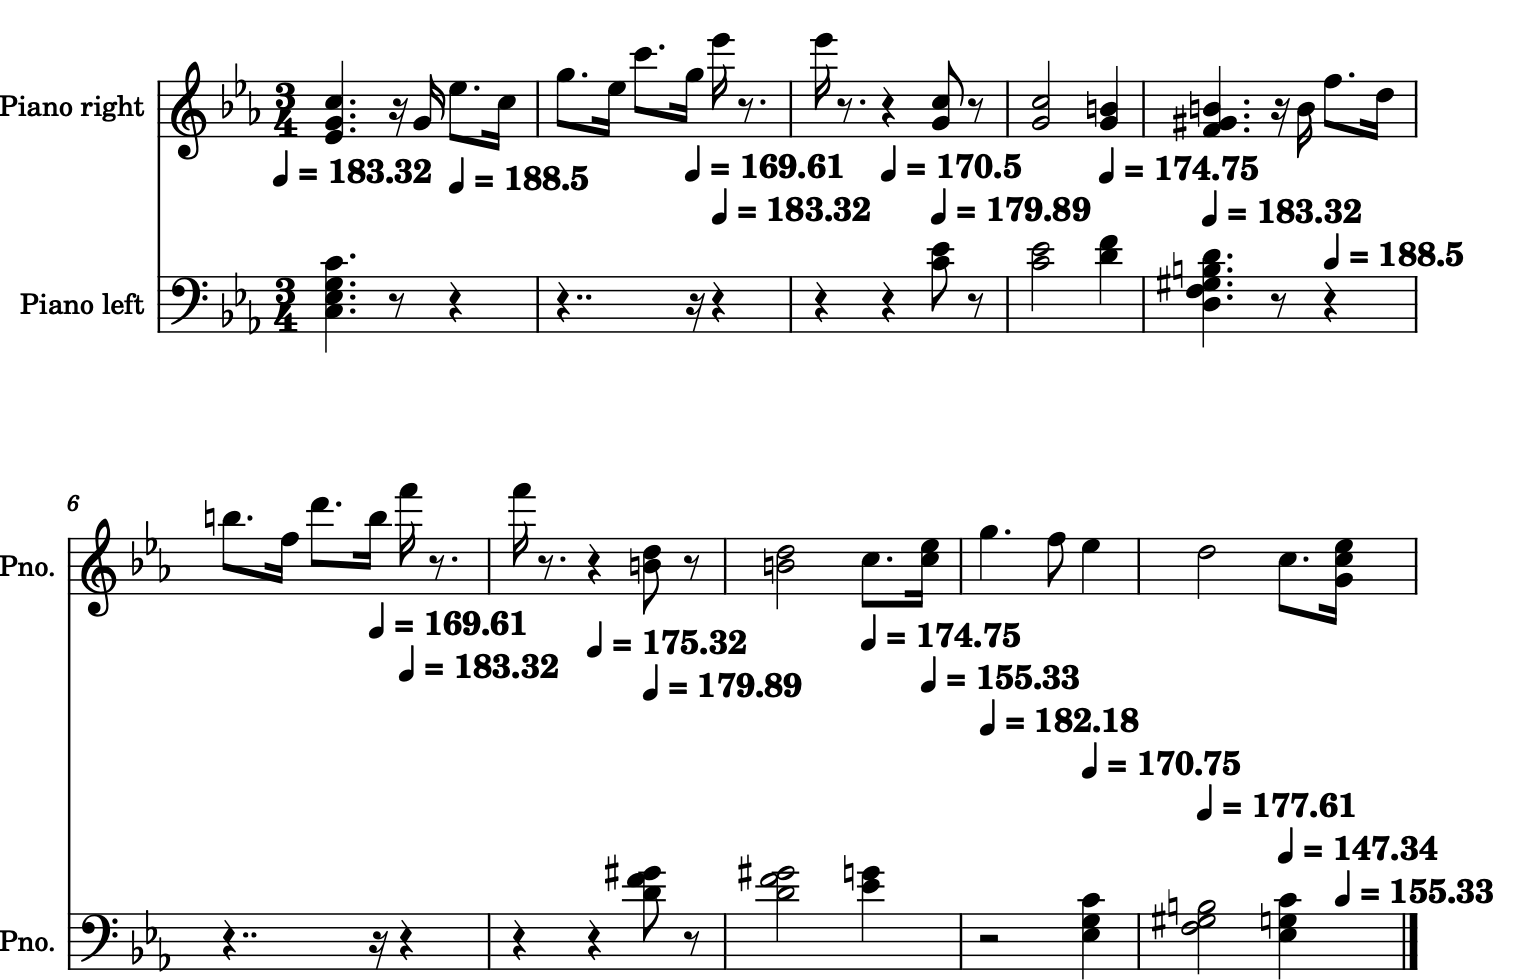

In [18]:
beethoven_opus.id='beethoven_opus'
beethoven_opus.measures(1,10).show()
#user guide chapter 22
#https://web.mit.edu/music21/doc/usersGuide/usersGuide_22_graphing.html

<music21.graph.plot.HorizontalBarPitchSpaceOffset for <music21.stream.Score beethoven_opus>>

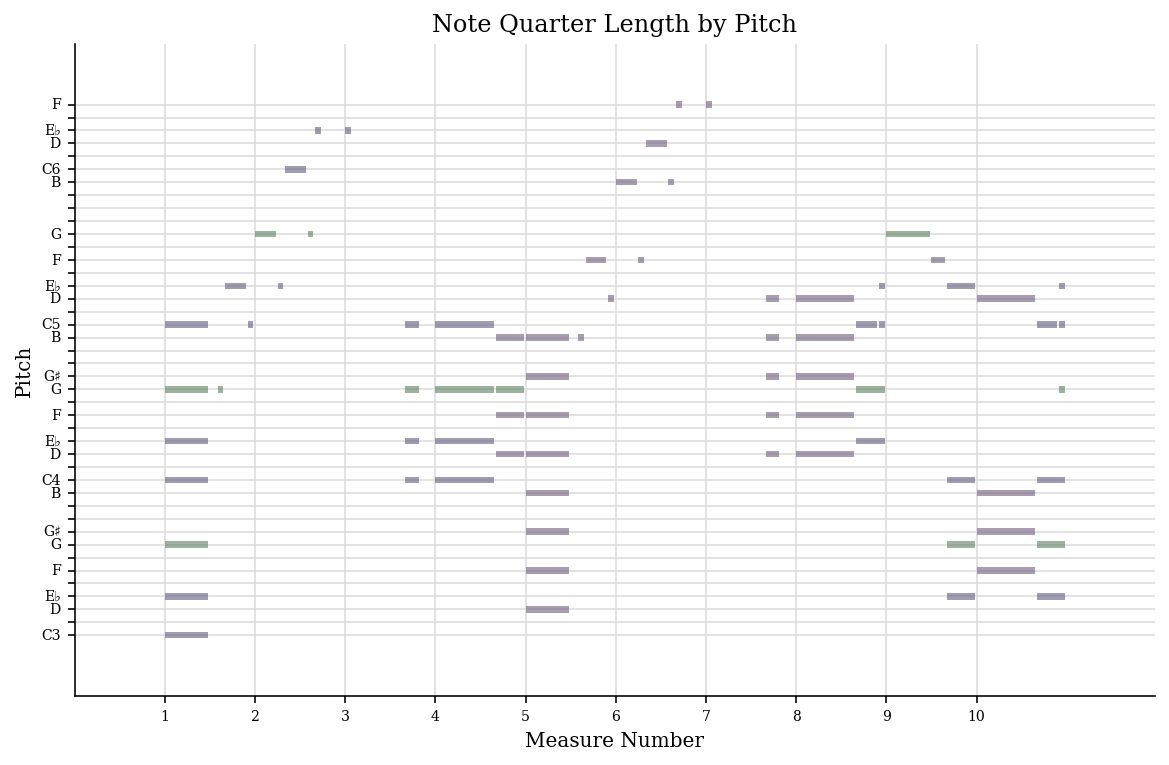

In [22]:
beethoven_opus.measures(1,10).plot()

<music21.graph.plot.ScatterPitchSpaceQuarterLength for <music21.stream.Score beethoven_opus>>

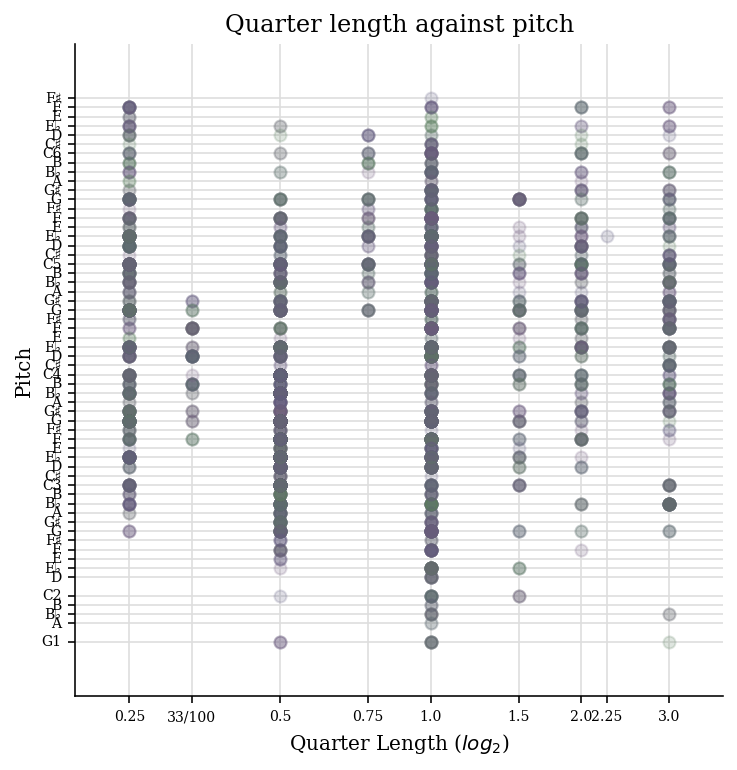

In [36]:
beethoven_opus.plot('scatter','quarterLength','pitch',title = 'Quarter length against pitch', figure=(12,7))

<music21.graph.plot.Histogram for <music21.stream.Score beethoven_opus>>

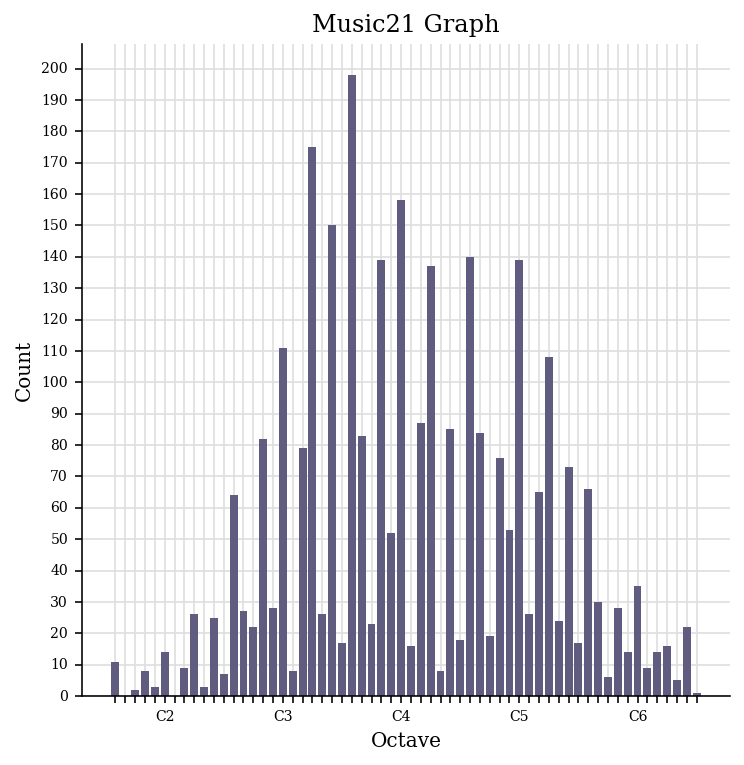

In [24]:
beethoven_opus.plot('histogram', 'octave', xHideUnused=False, yAxisLabel='Number of Pitches')

<music21.graph.plot.HistogramPitchClass for <music21.stream.Score beethoven_opus>>

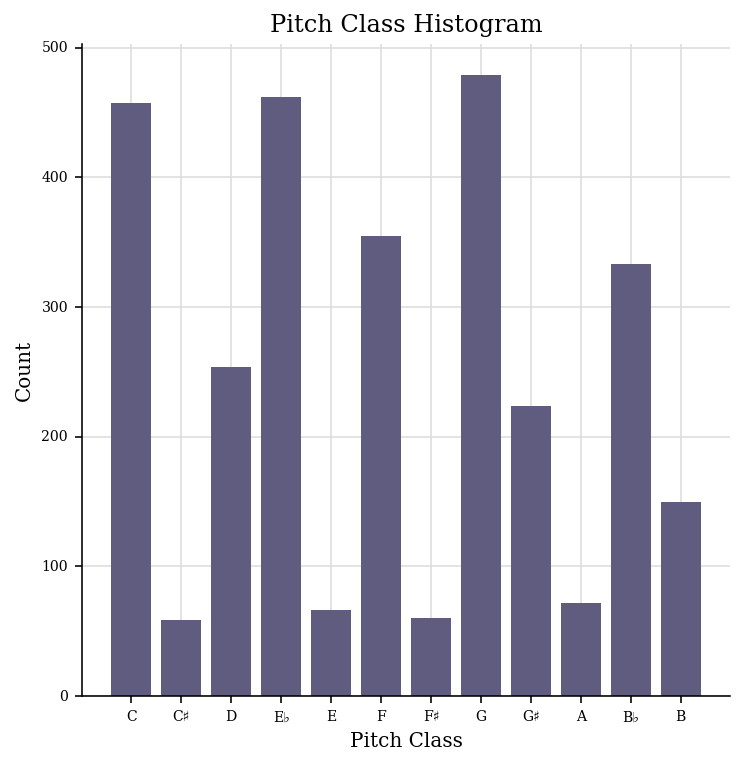

In [25]:
beethoven_opus.plot('histogram','pitchClass')

<music21.graph.plot.WindowedKey for <music21.stream.Score beethoven_opus>>

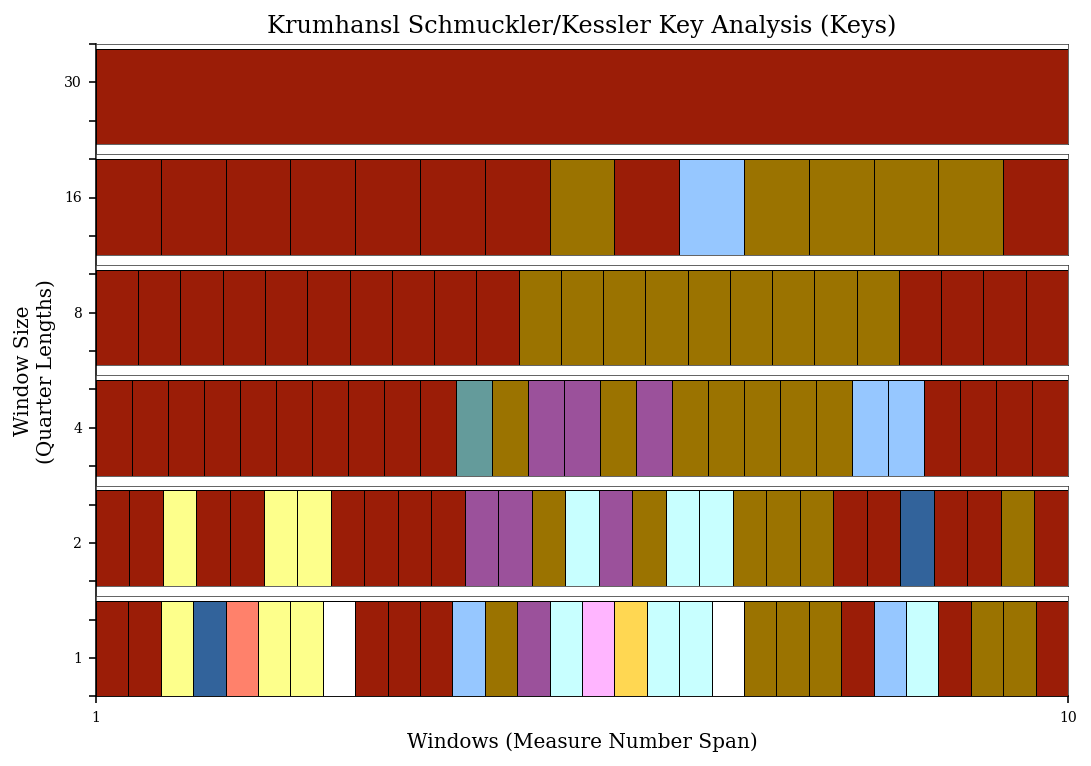

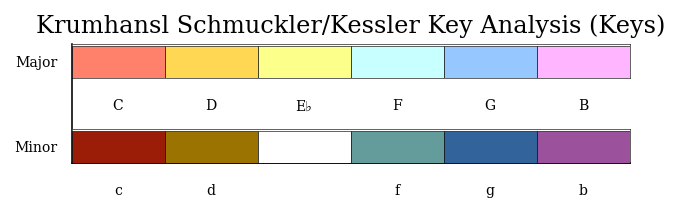

In [27]:
beethoven_opus.measures(1,10).plot('colorgrid')

In [37]:
brahms_opus=converter.parse('archive (1)/brahms_opus1_1.mid')
brahms_opus.id='brahms_opus'

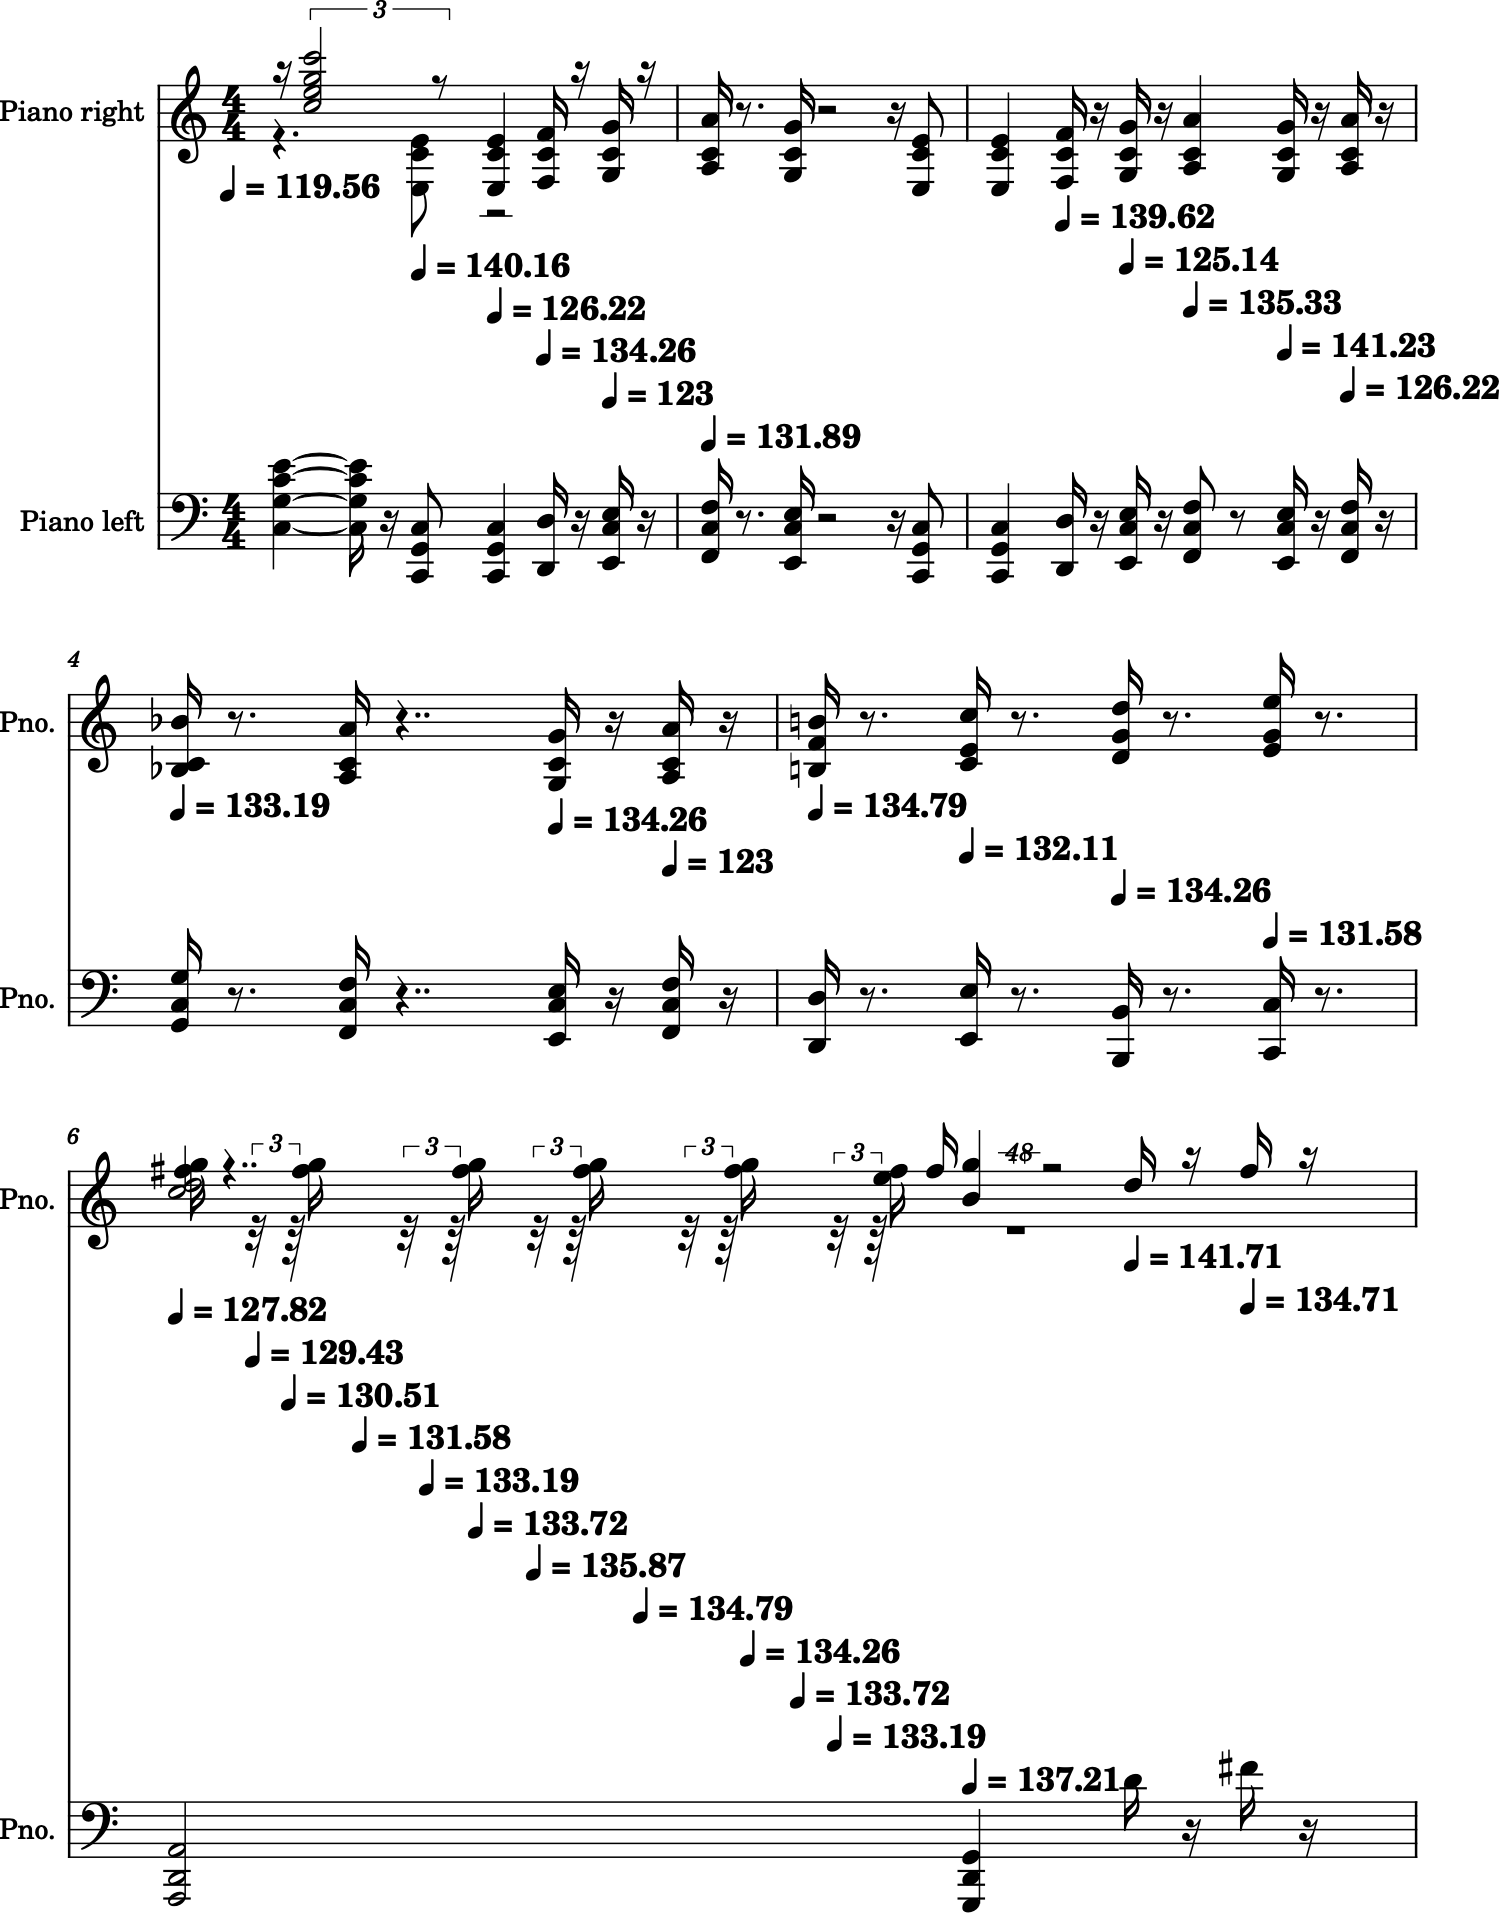

In [38]:
brahms_opus.measures(1,10).show()

<music21.graph.plot.HorizontalBarPitchSpaceOffset for <music21.stream.Score brahms_opus>>

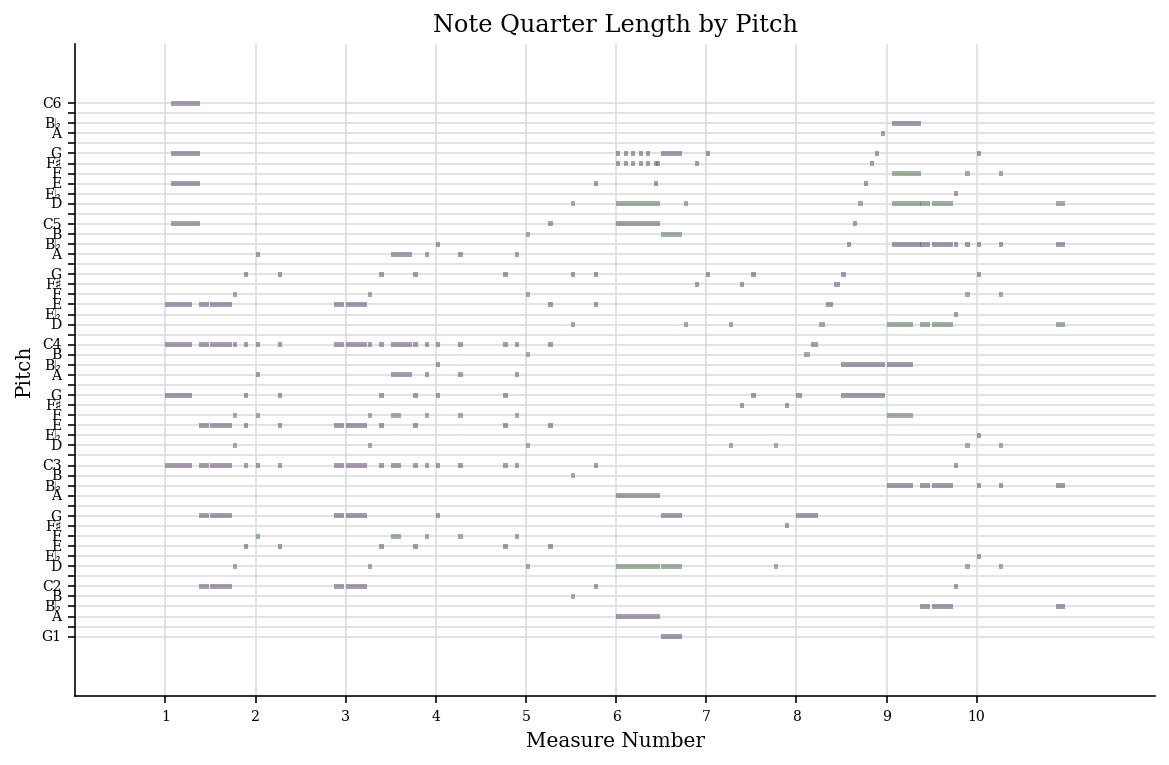

In [39]:
brahms_opus.measures(1,10).plot()

<music21.graph.plot.ScatterPitchSpaceQuarterLength for <music21.stream.Score brahms_opus>>

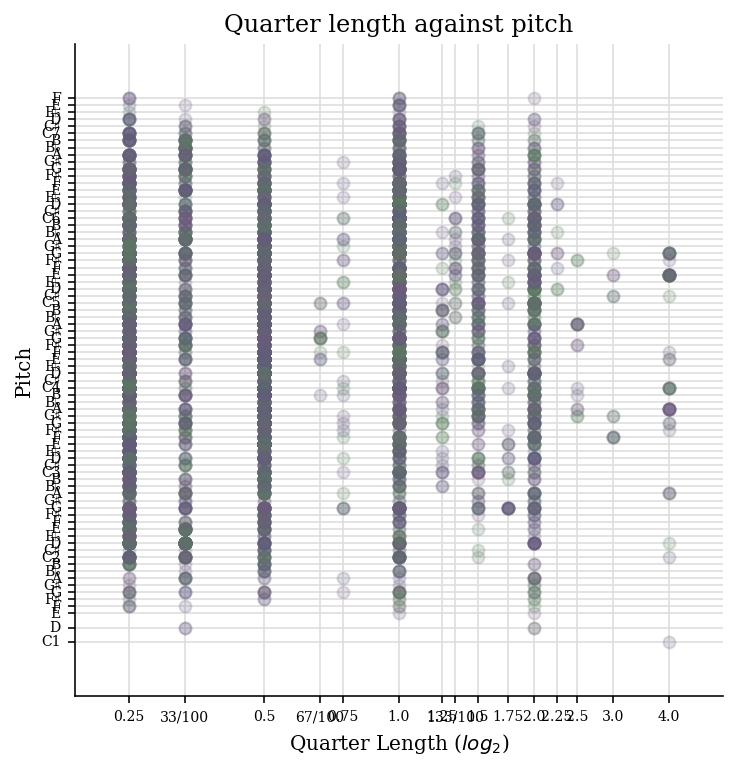

In [41]:
brahms_opus.plot('scatter','quarterLength','pitch',title = 'Quarter length against pitch', figure=(12,7))

<music21.graph.plot.Histogram for <music21.stream.Score brahms_opus>>

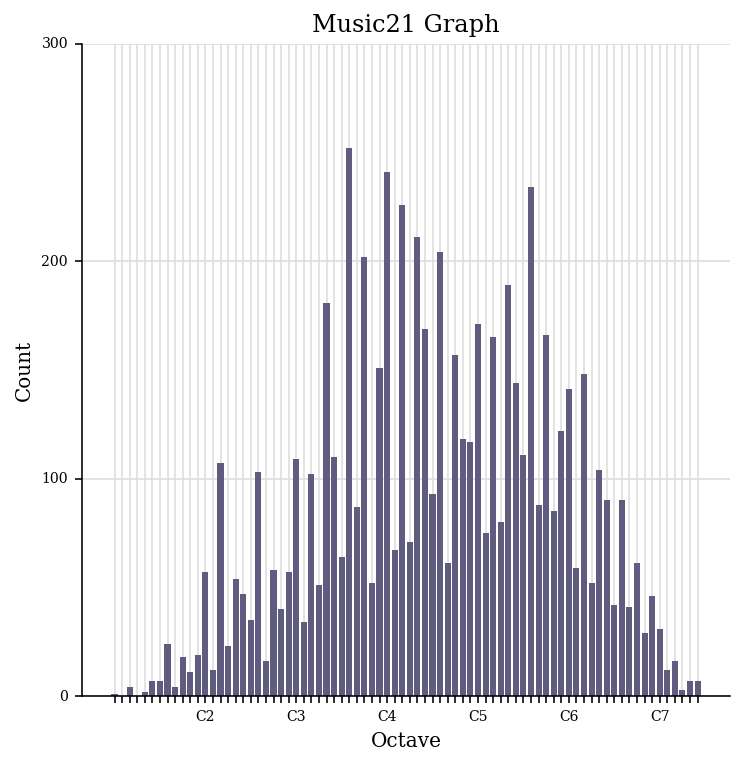

In [42]:
brahms_opus.plot('histogram', 'octave', xHideUnused=False, yAxisLabel='Number of Pitches')

<music21.graph.plot.HistogramPitchClass for <music21.stream.Score brahms_opus>>

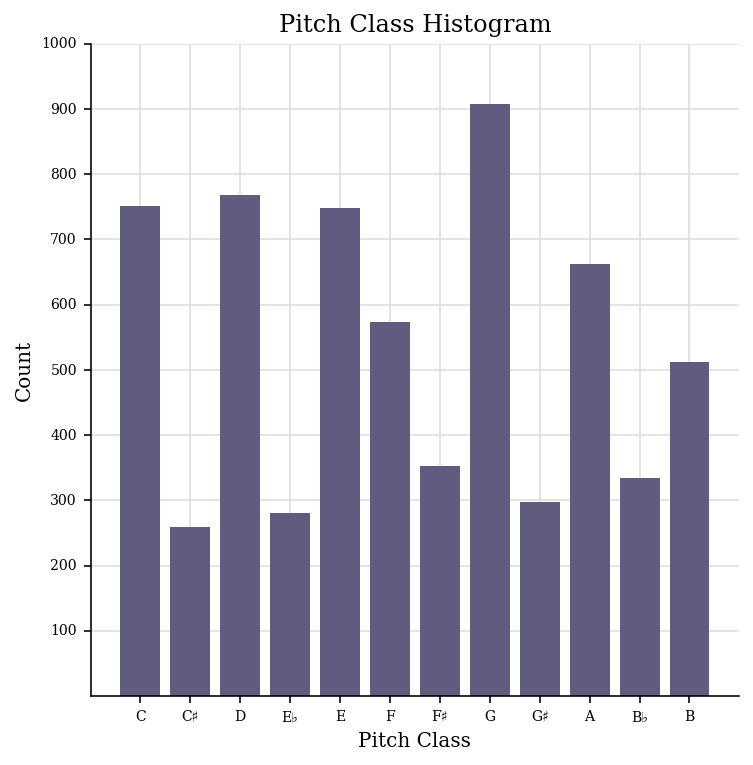

In [43]:
brahms_opus.plot('histogram','pitchClass')

<music21.graph.plot.WindowedKey for <music21.stream.Score brahms_opus>>

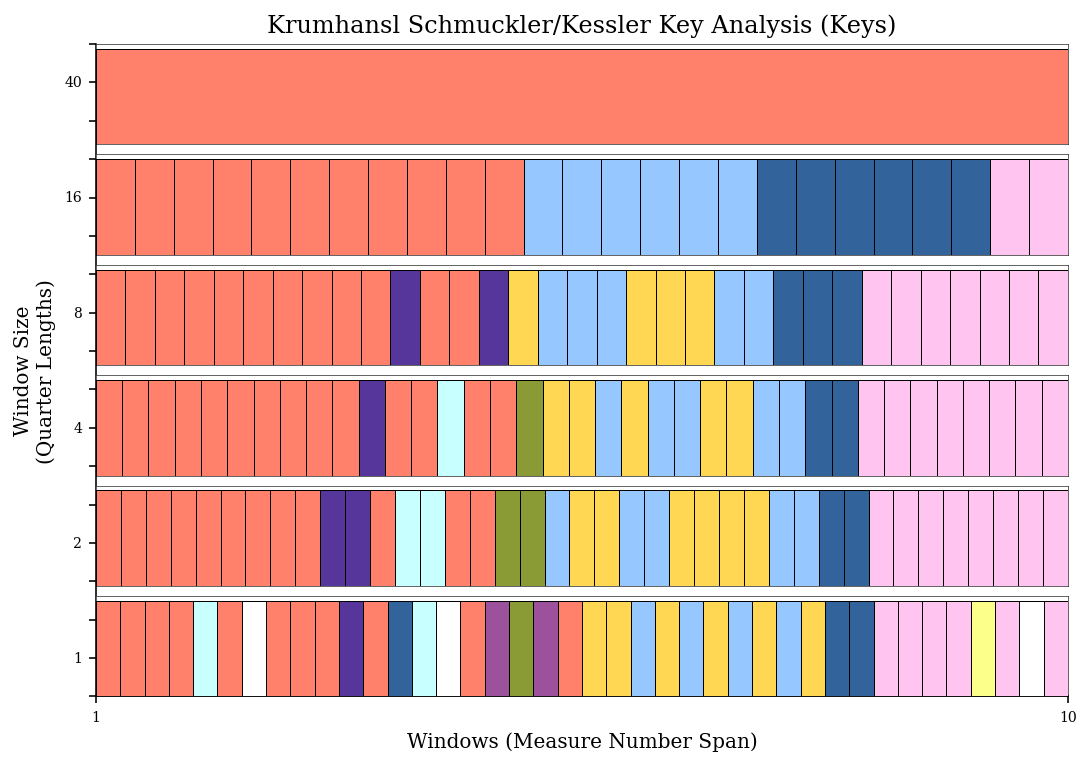

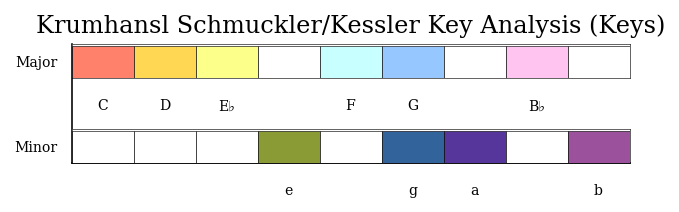

In [44]:
brahms_opus.measures(1,10).plot('colorgrid')

In [45]:
chopin_opus=converter.parse('archive (1)/chpn_op10_e01.mid')
chopin_opus.id='chopin_opus'

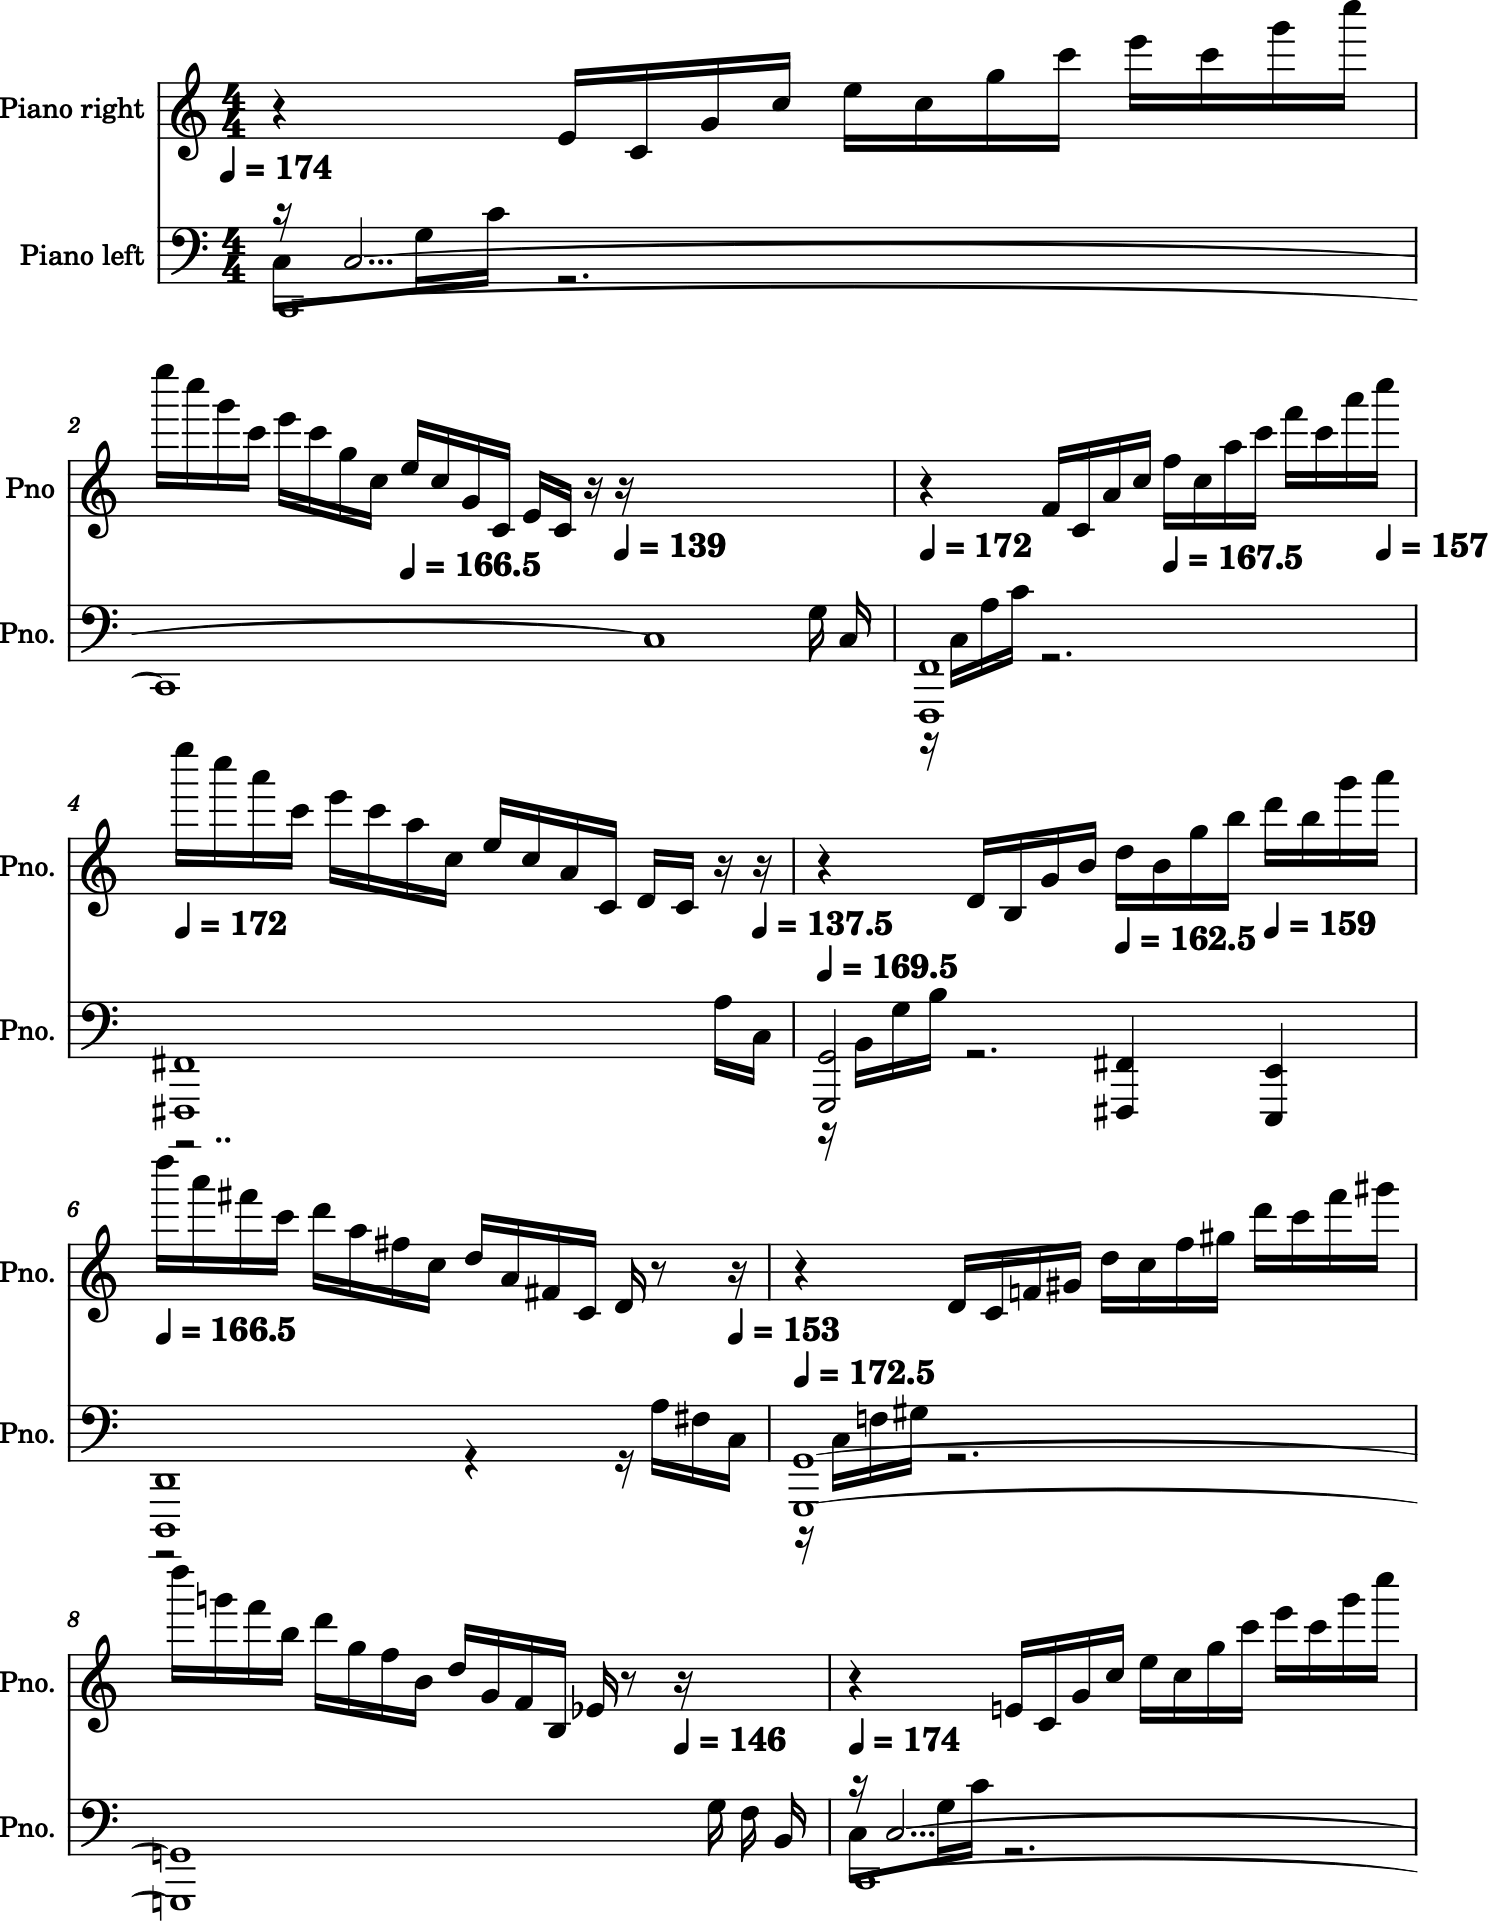

In [46]:
chopin_opus.measures(1,10).show()

<music21.graph.plot.HorizontalBarPitchSpaceOffset for <music21.stream.Score chopin_opus>>

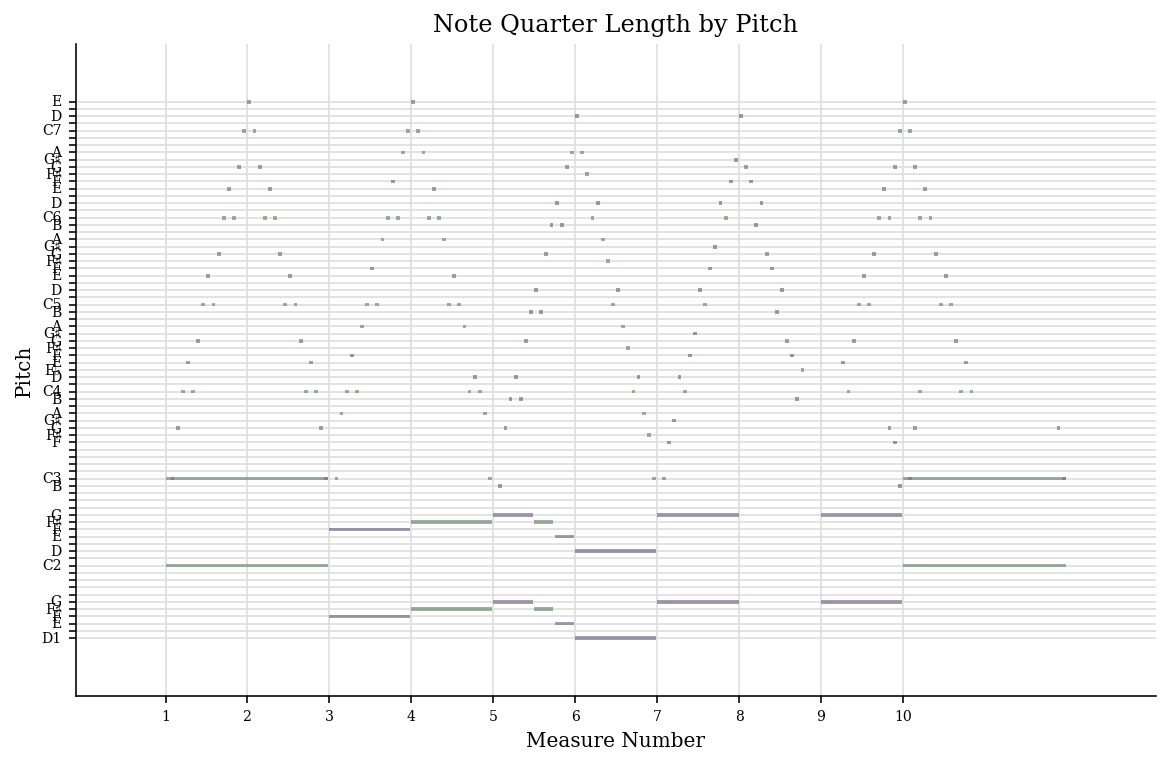

In [47]:
chopin_opus.measures(1,10).plot()

<music21.graph.plot.ScatterPitchSpaceQuarterLength for <music21.stream.Score chopin_opus>>

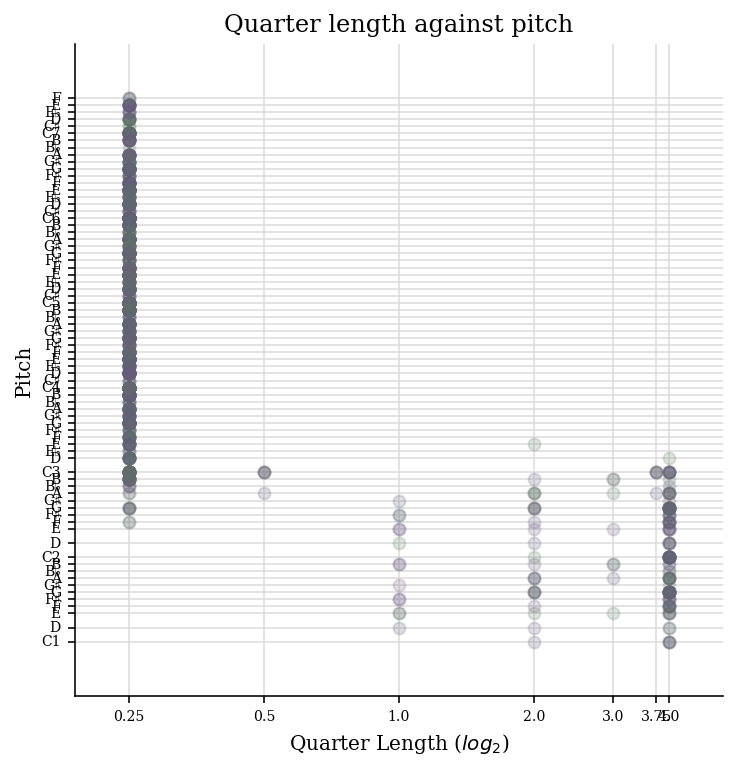

In [48]:
chopin_opus.plot('scatter','quarterLength','pitch',title = 'Quarter length against pitch', figure=(12,7))

<music21.graph.plot.HistogramPitchClass for <music21.stream.Score chopin_opus>>

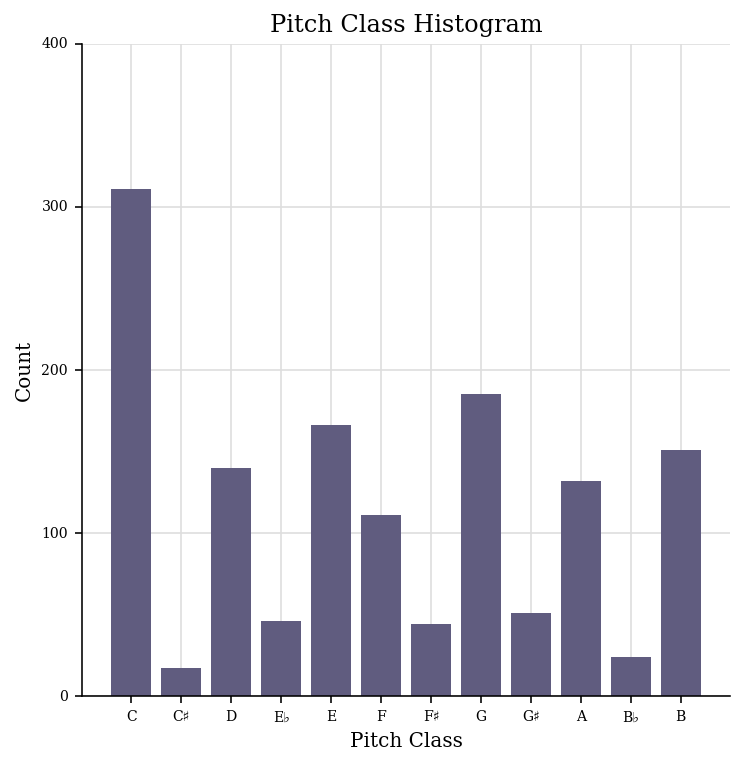

In [49]:
chopin_opus.plot('histogram','pitchClass')

<music21.graph.plot.WindowedKey for <music21.stream.Score chopin_opus>>

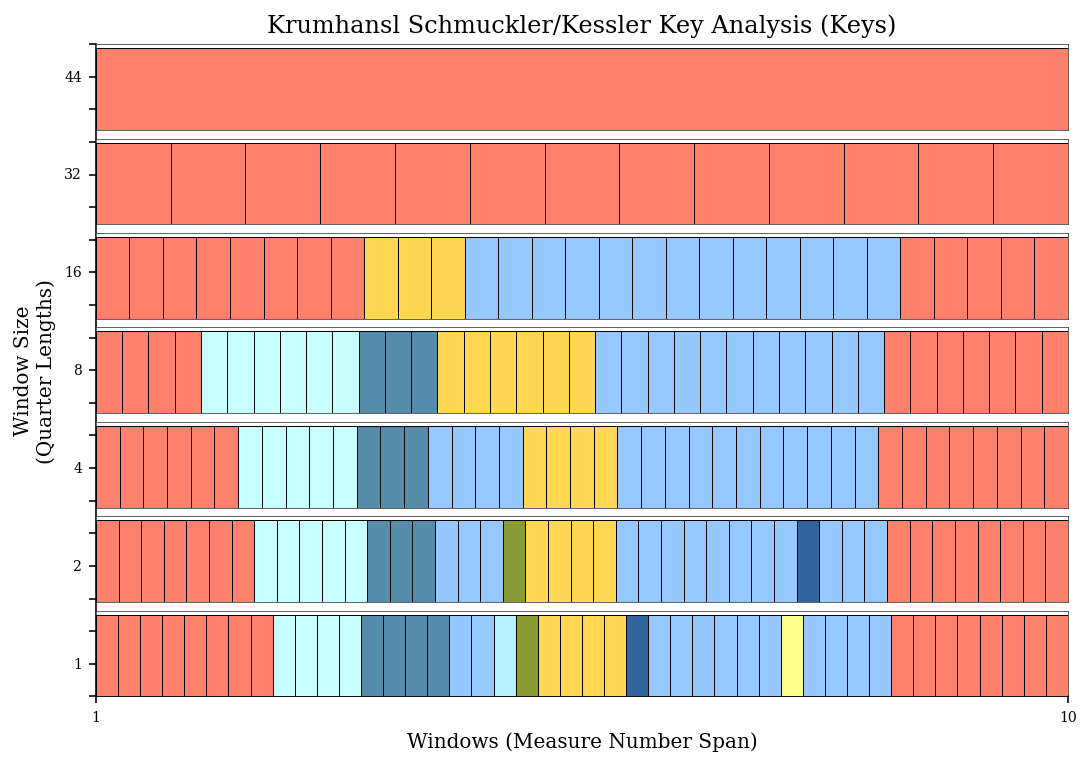

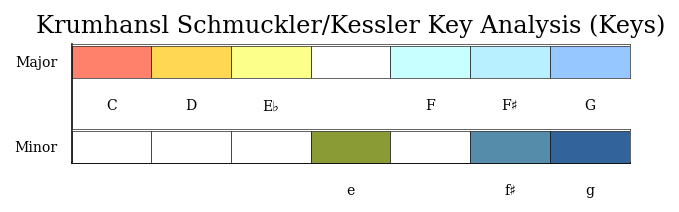

In [50]:
chopin_opus.measures(1,10).plot('colorgrid')

In [51]:
mozart_311=converter.parse('archive (1)/mozart/mz_311_1.mid')
mozart_311.id='mozart_311'

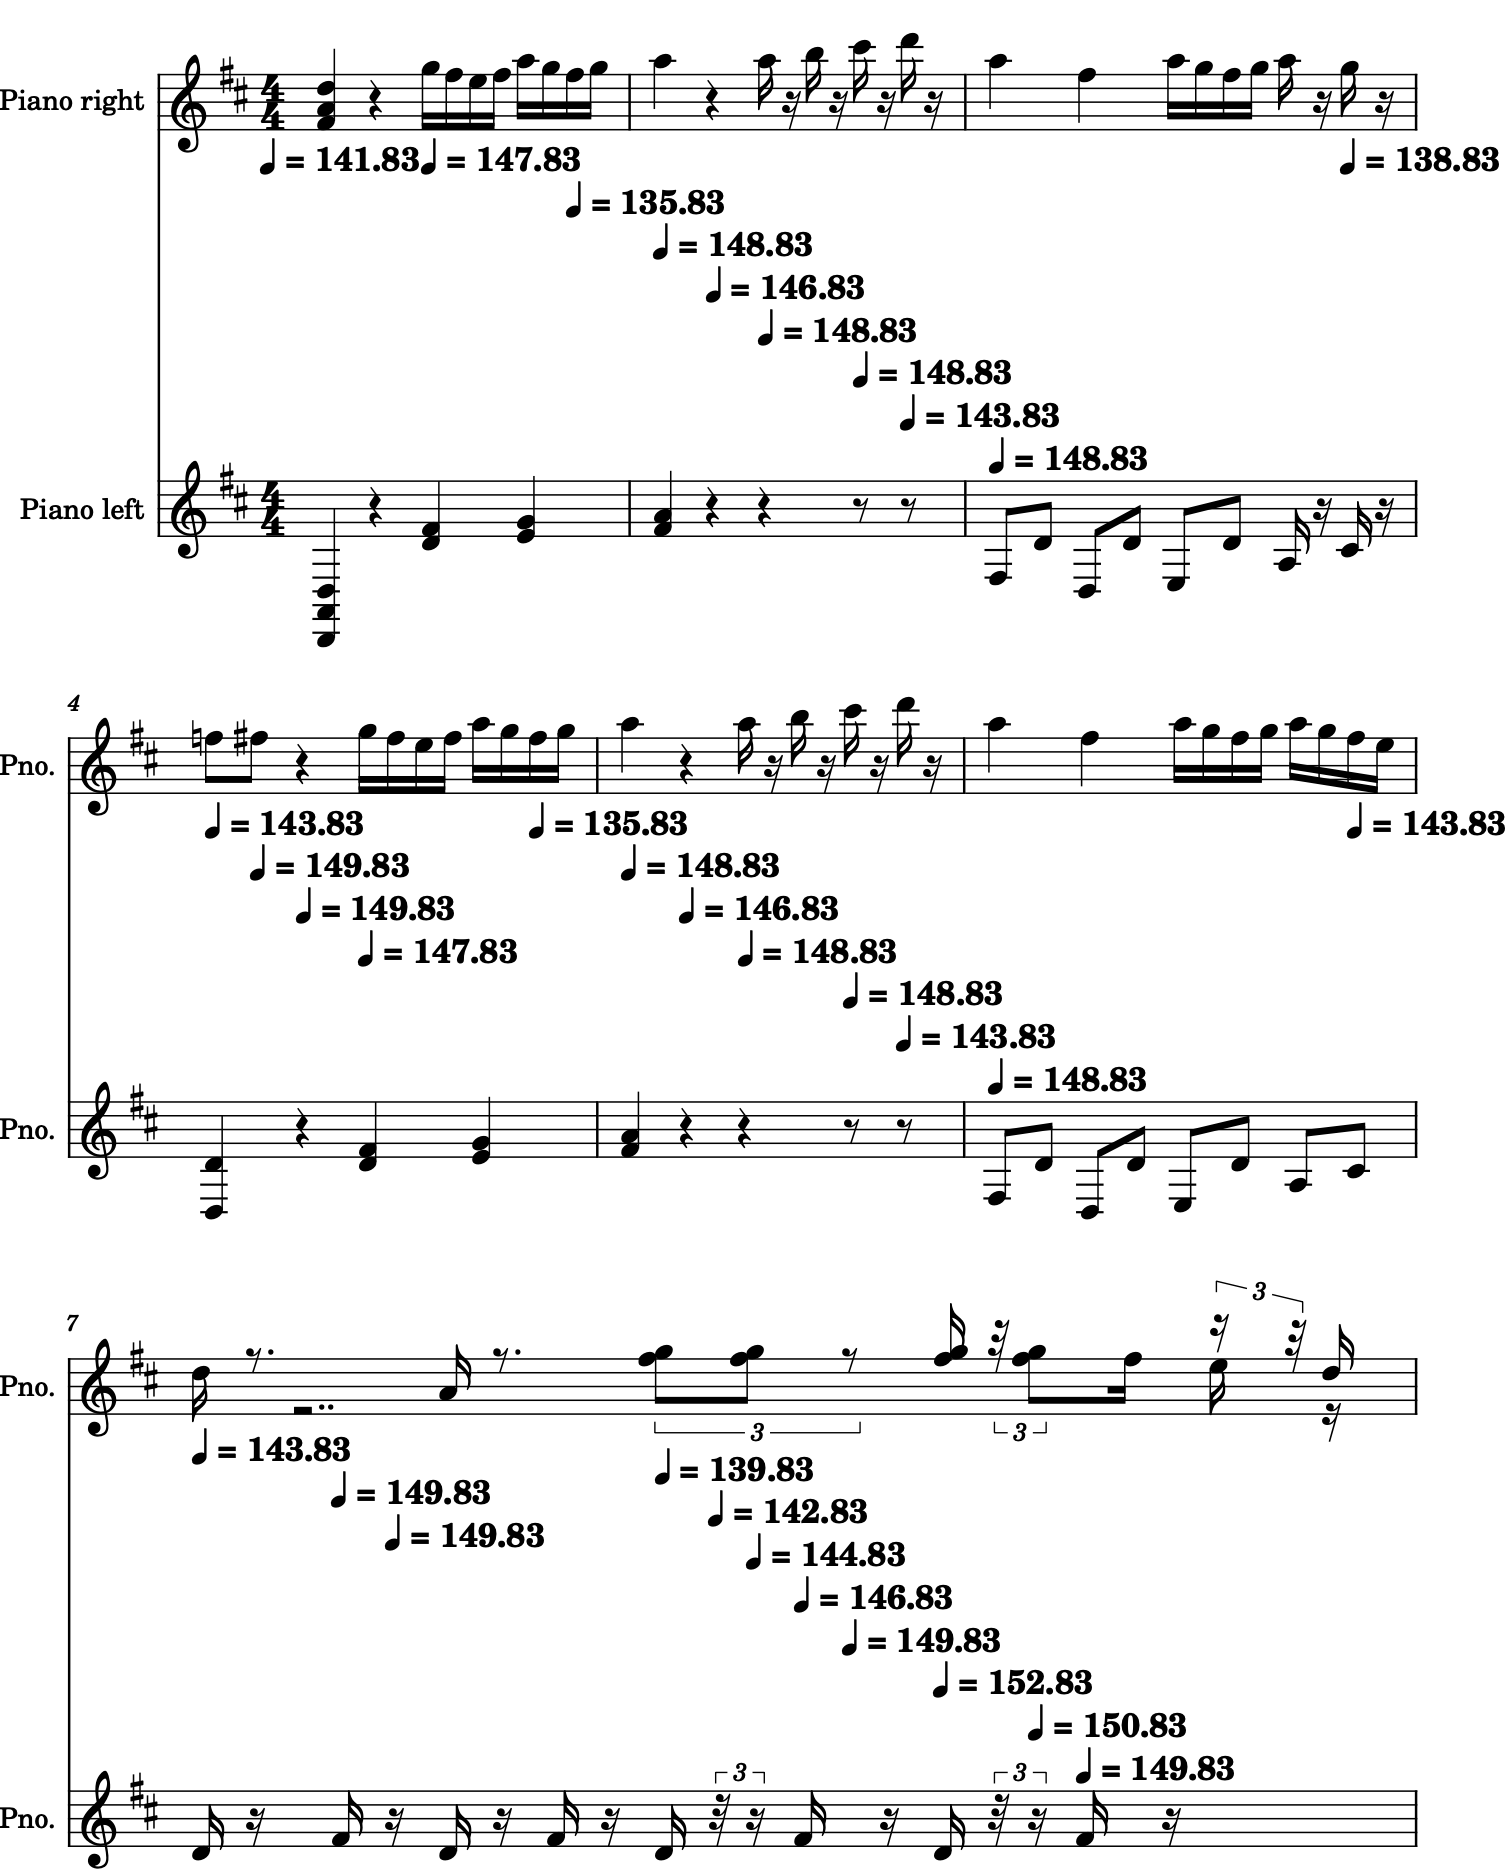

In [52]:
mozart_311.measures(1,10).show()

<music21.graph.plot.HorizontalBarPitchSpaceOffset for <music21.stream.Score mozart_311>>

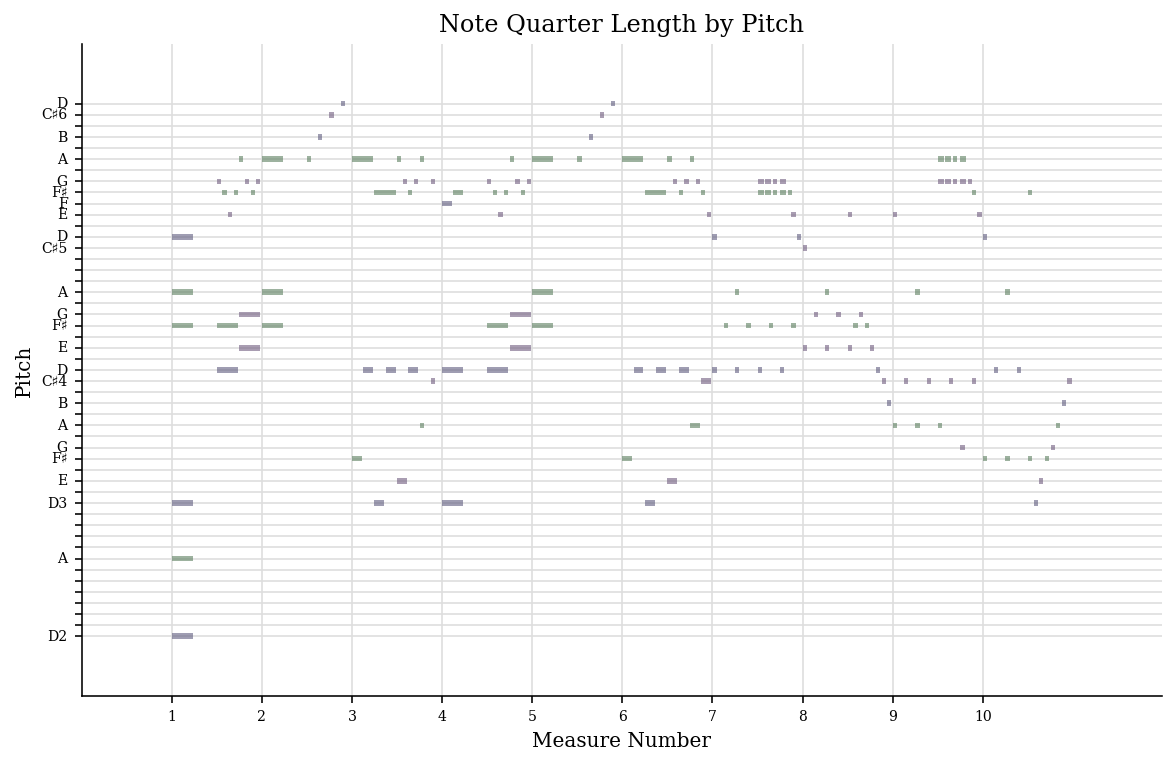

In [53]:
mozart_311.measures(1,10).plot()

<music21.graph.plot.ScatterPitchSpaceQuarterLength for <music21.stream.Score mozart_311>>

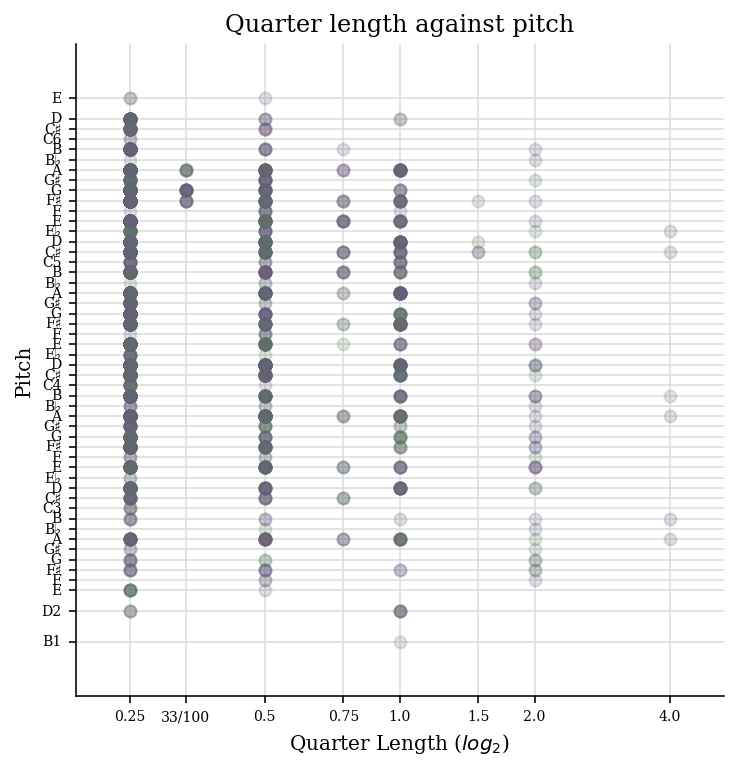

In [54]:
mozart_311.plot('scatter','quarterLength','pitch',title = 'Quarter length against pitch', figure=(12,7))

<music21.graph.plot.HistogramPitchClass for <music21.stream.Score mozart_311>>

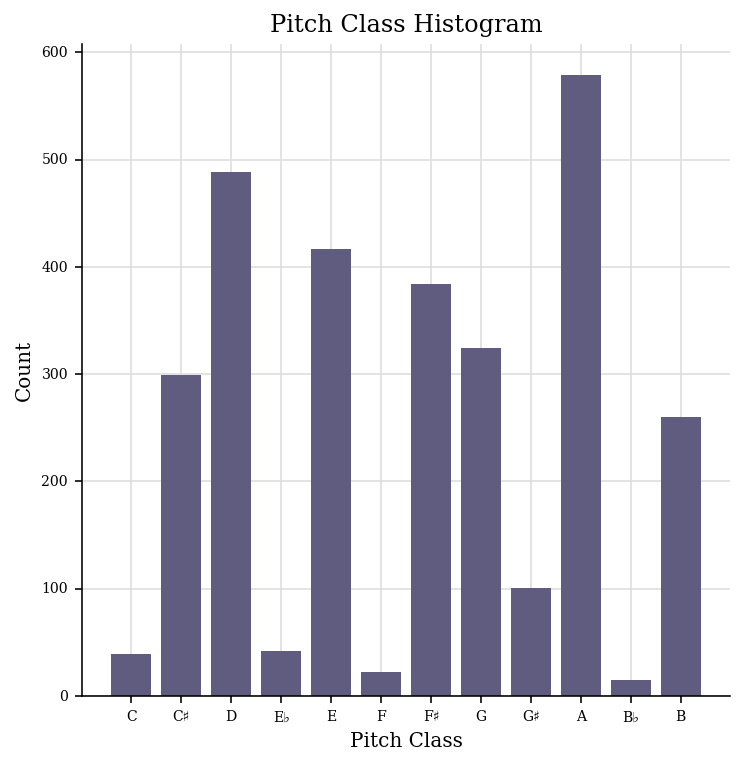

In [55]:
mozart_311.plot('histogram','pitchClass')

<music21.graph.plot.WindowedKey for <music21.stream.Score mozart_311>>

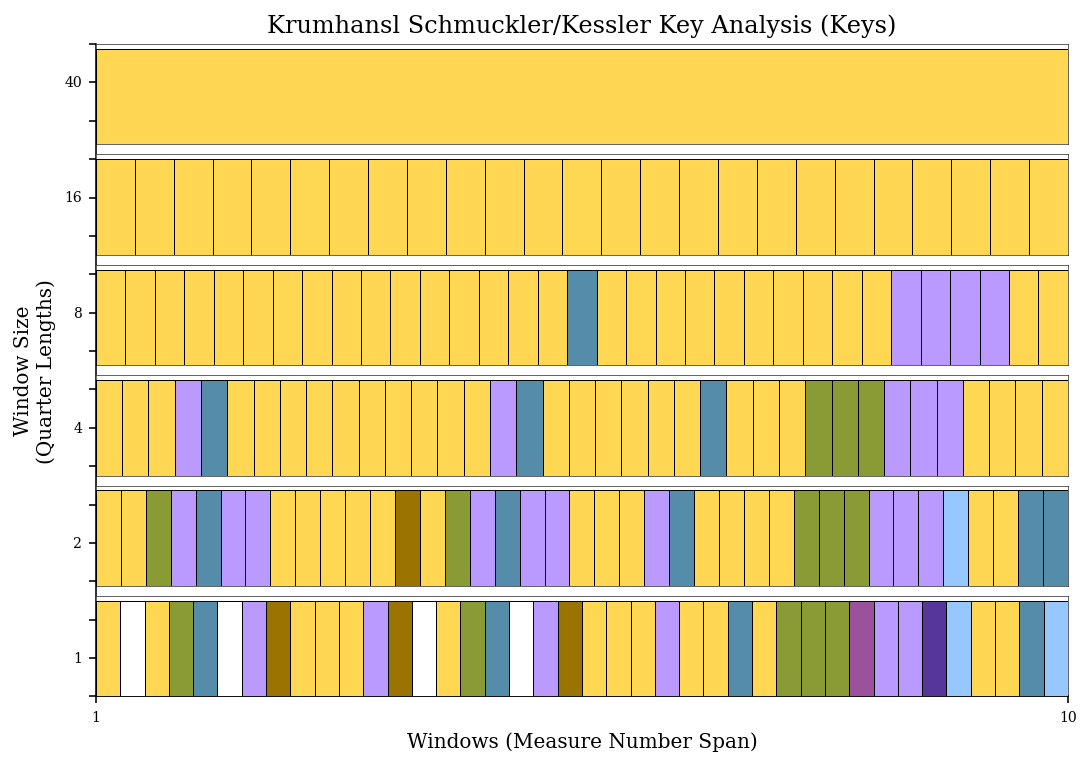

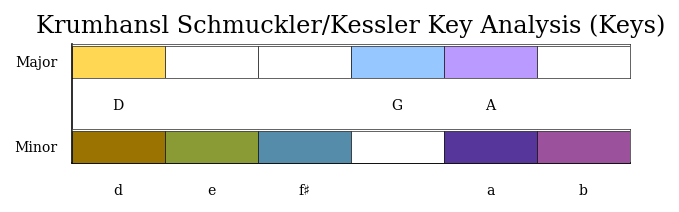

In [58]:
mozart_311.measures(1,10).plot('colorgrid')

In [59]:
gershwin_xml= converter.parse('xml file/George_Gershwin_-_Summer_Time_-_Piano_Cover_-_Am.mxl')

In [60]:
gershwin_xml.id='gerswhin_xml'

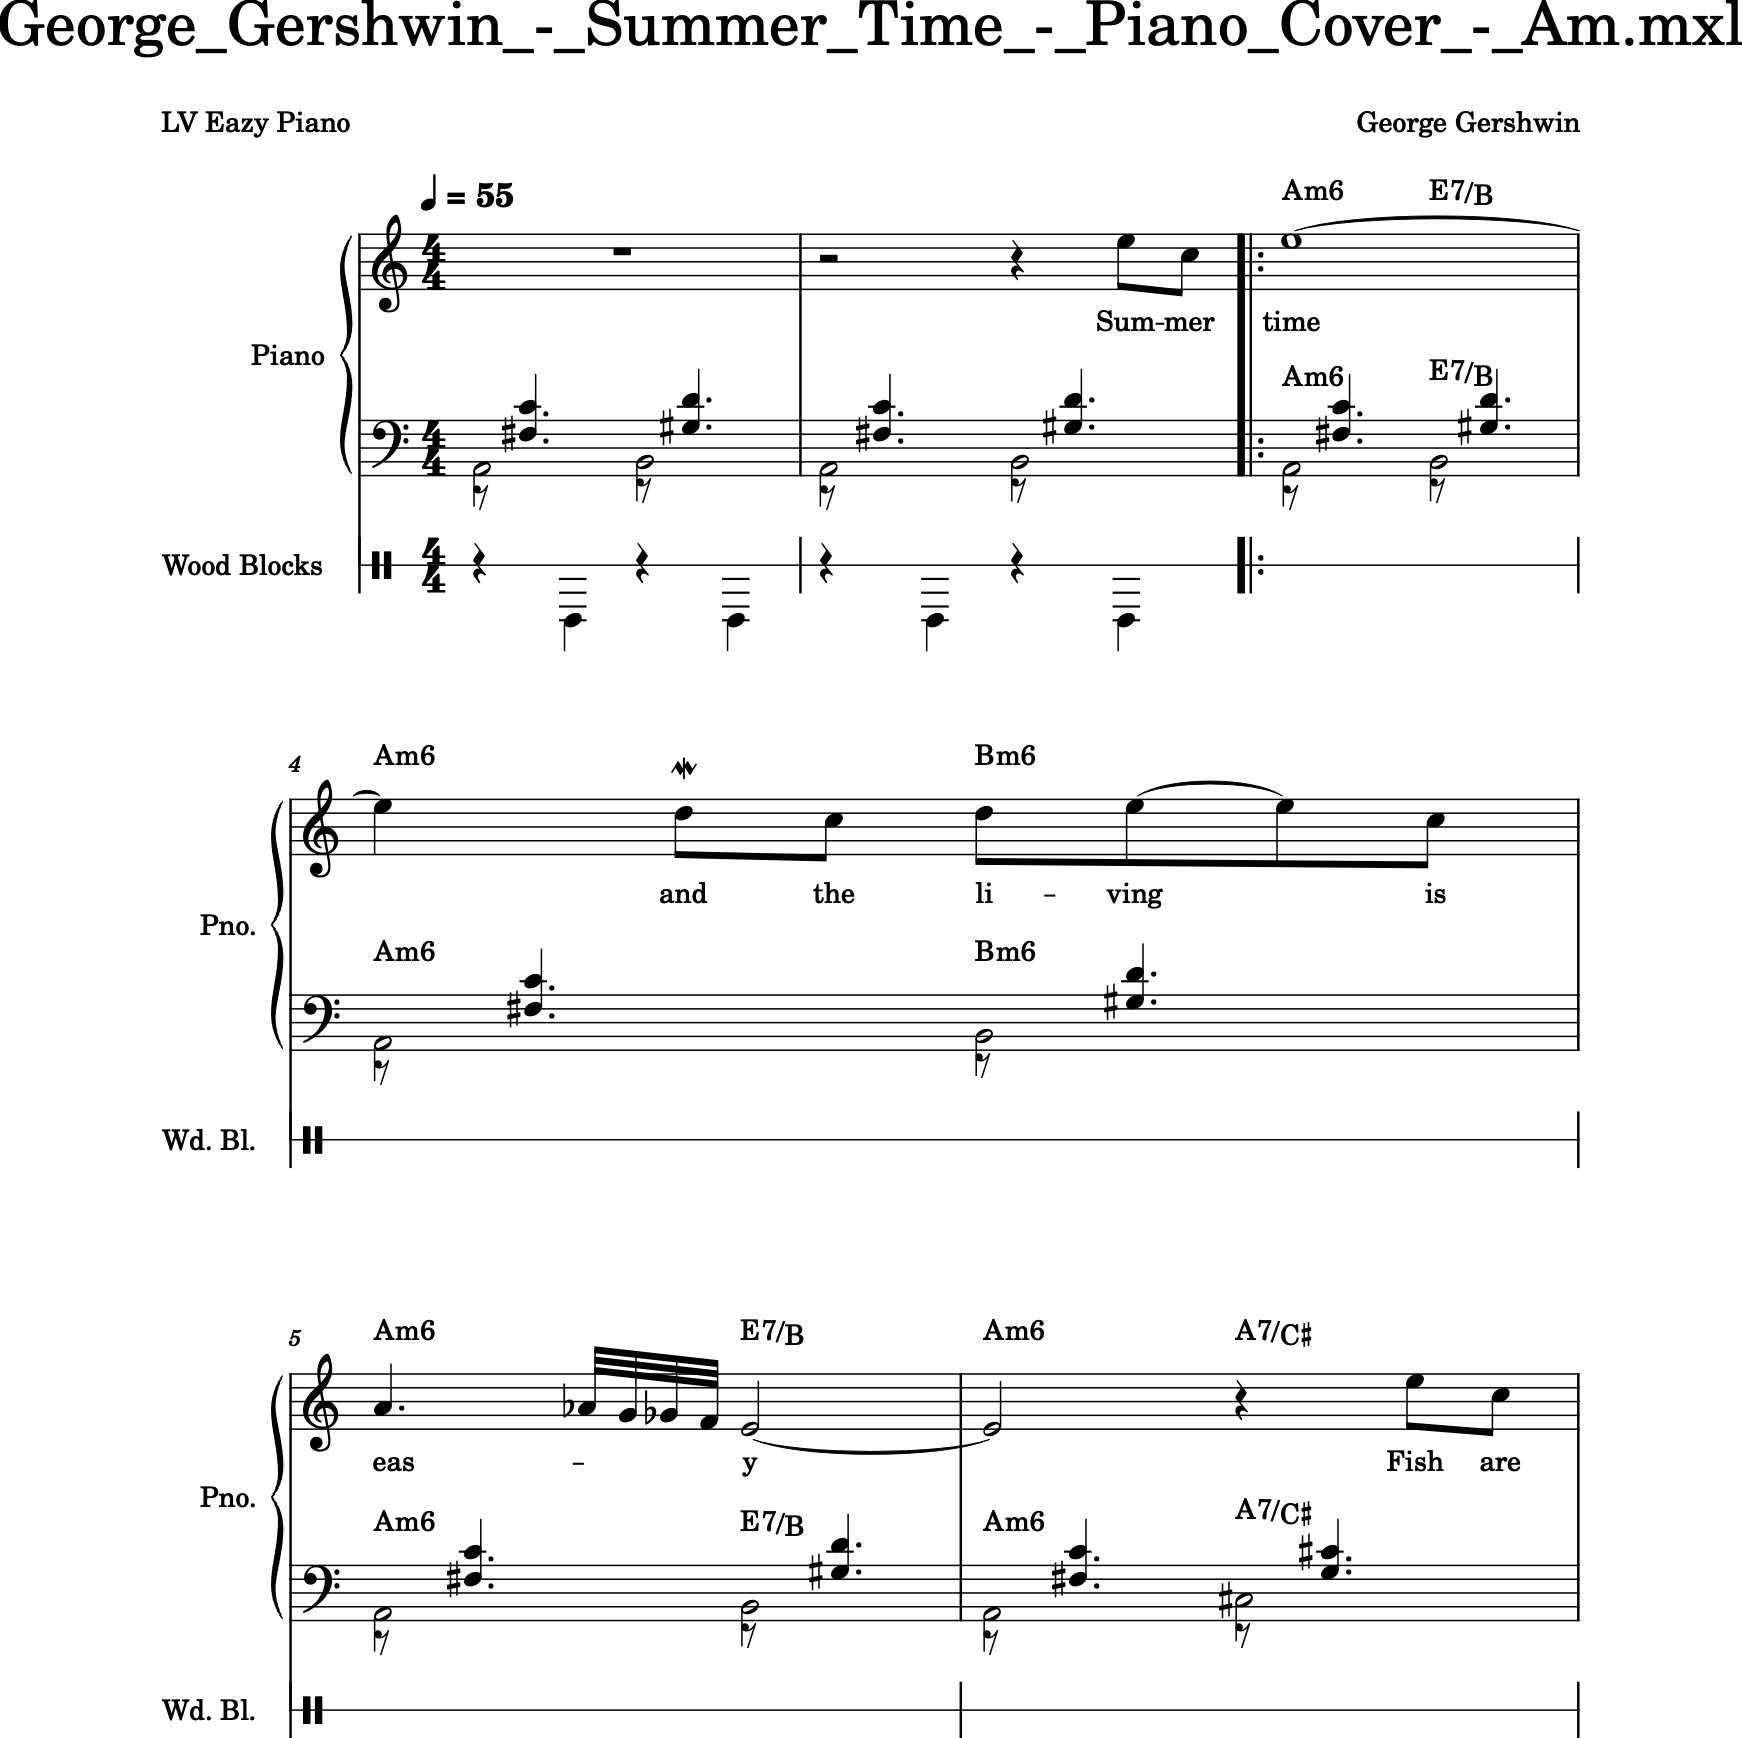

In [61]:
gershwin_xml.measures(1,10).show()

<music21.graph.plot.HorizontalBarPitchSpaceOffset for <music21.stream.Score gerswhin_xml>>

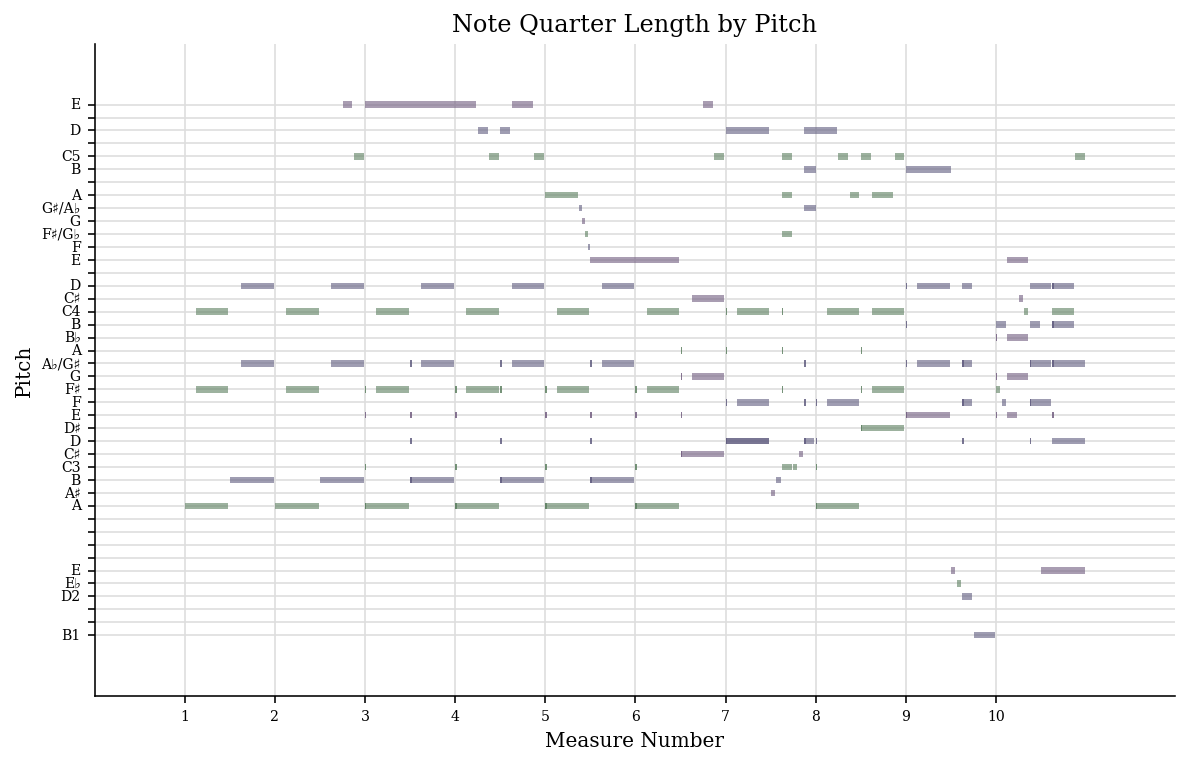

In [62]:
gershwin_xml.measures(1,10).plot()

<music21.graph.plot.HistogramPitchClass for <music21.stream.Score gerswhin_xml>>

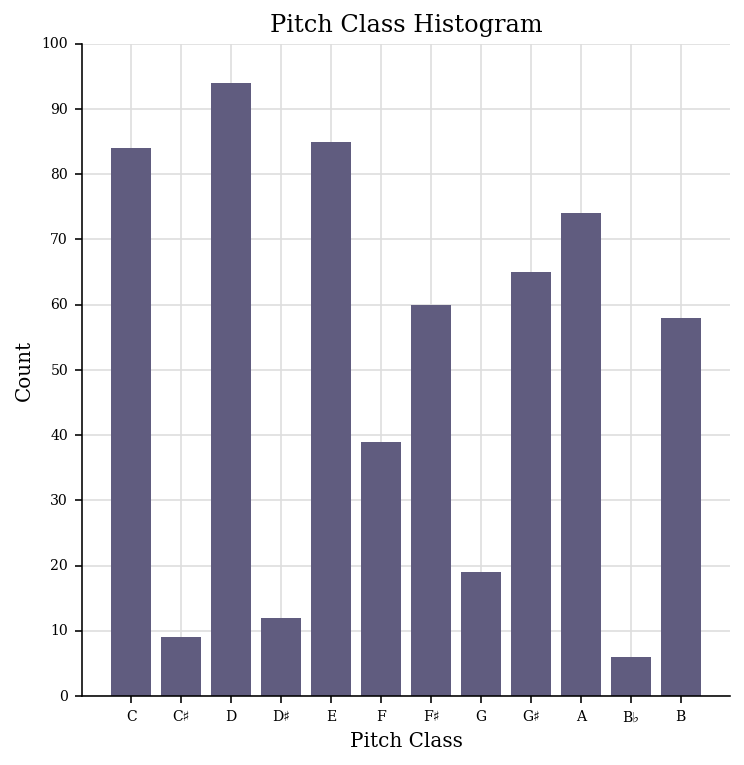

In [63]:
gershwin_xml.plot('histogram','pitchClass')

In [69]:
midi1=converter.parse('data/midi1.mid')
midi1.id='midi1'

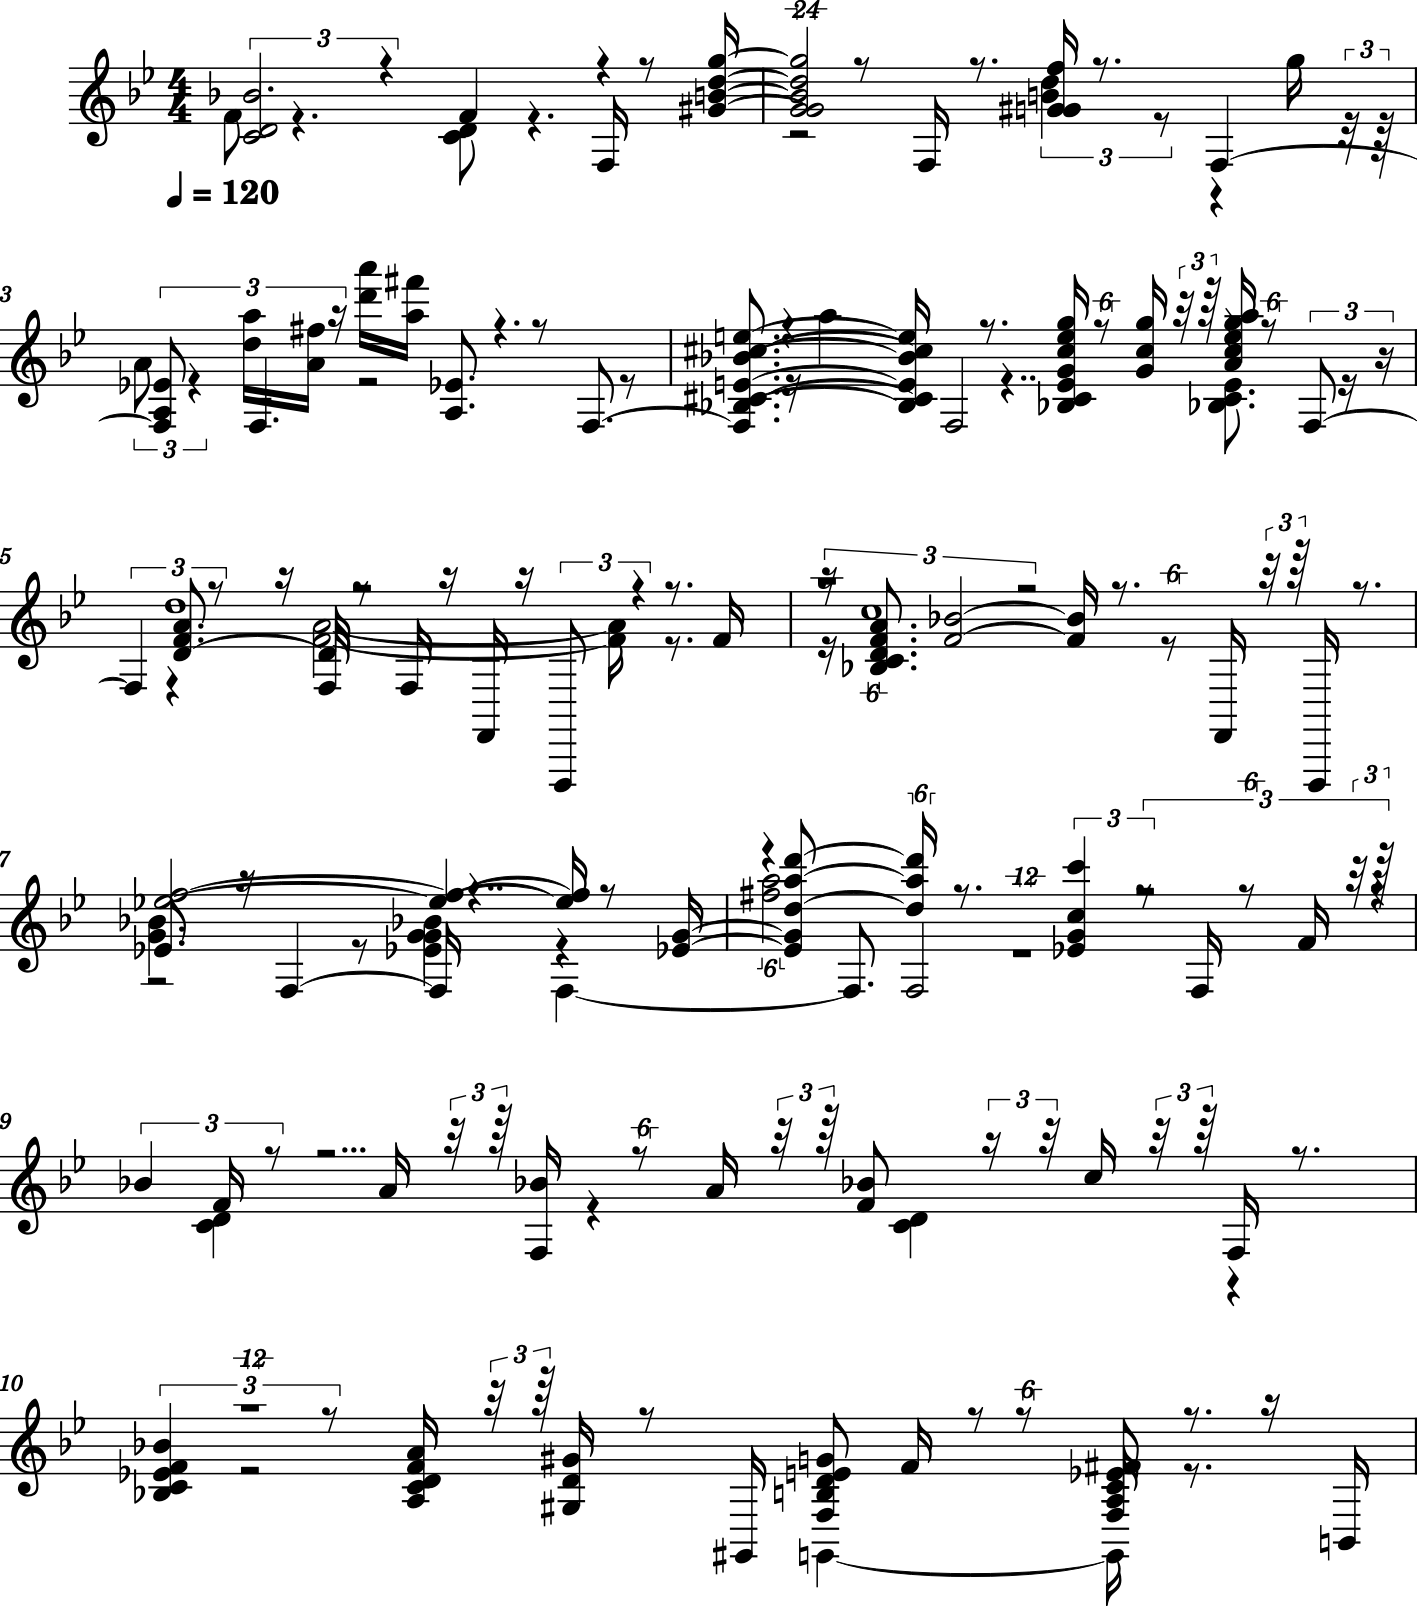

In [72]:
midi1.measures(1,10).show()

<music21.graph.plot.HorizontalBarPitchSpaceOffset for <music21.stream.Score midi1>>

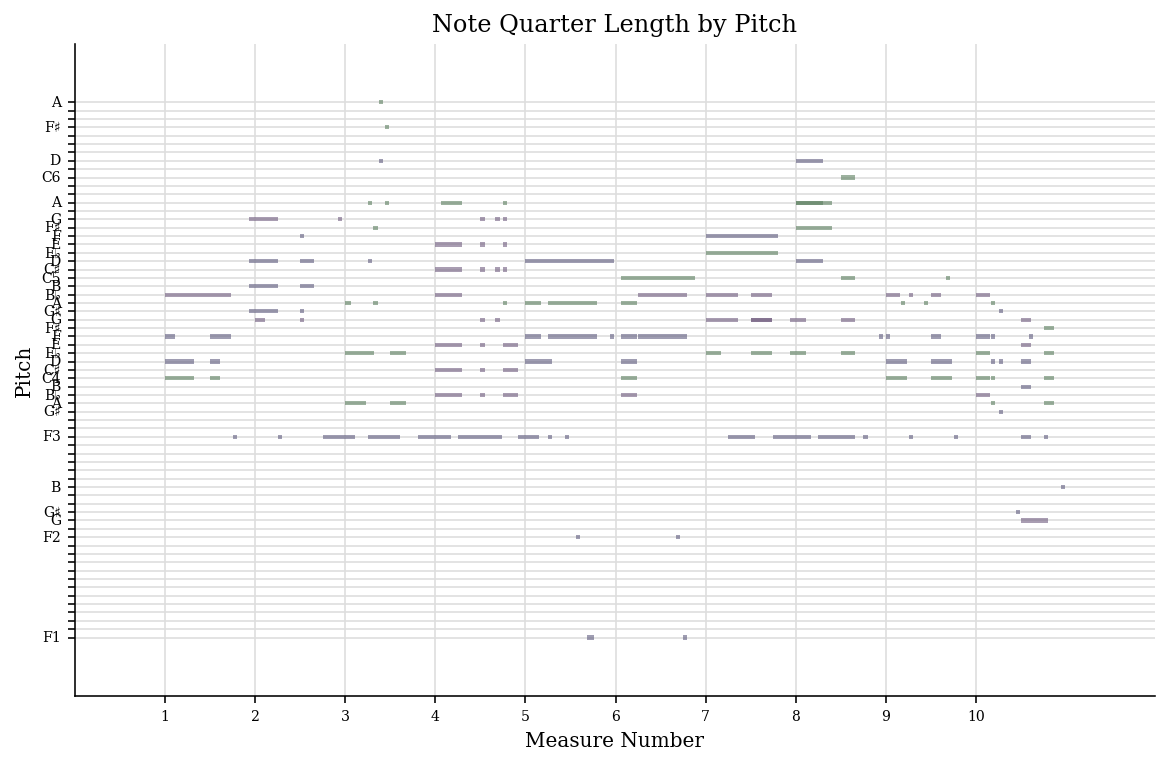

In [73]:
midi1.measures(1,10).plot()

<music21.graph.plot.HistogramPitchClass for <music21.stream.Score midi1>>

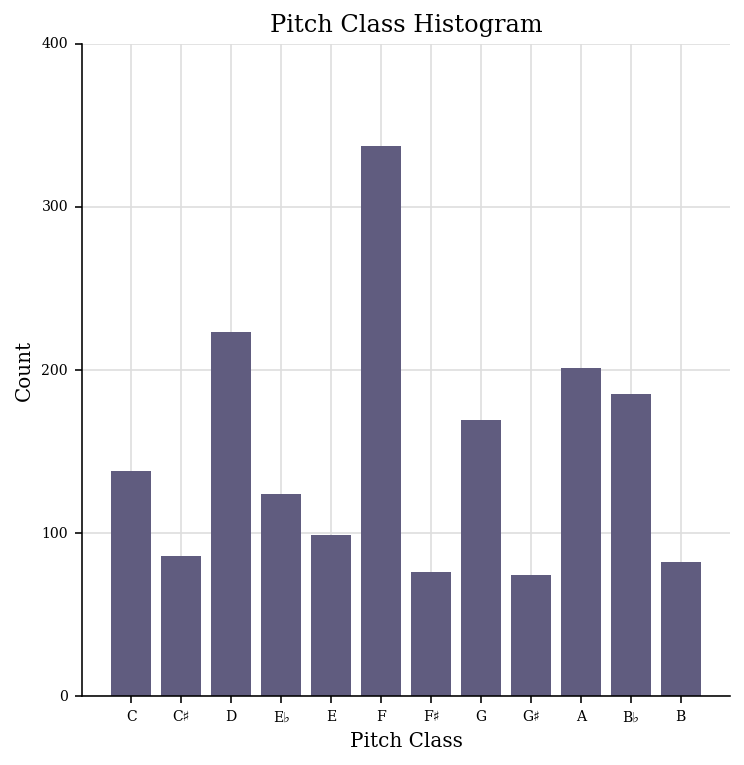

In [70]:
midi1.plot('histogram','pitchClass')

<music21.graph.plot.WindowedKey for <music21.stream.Score midi1>>

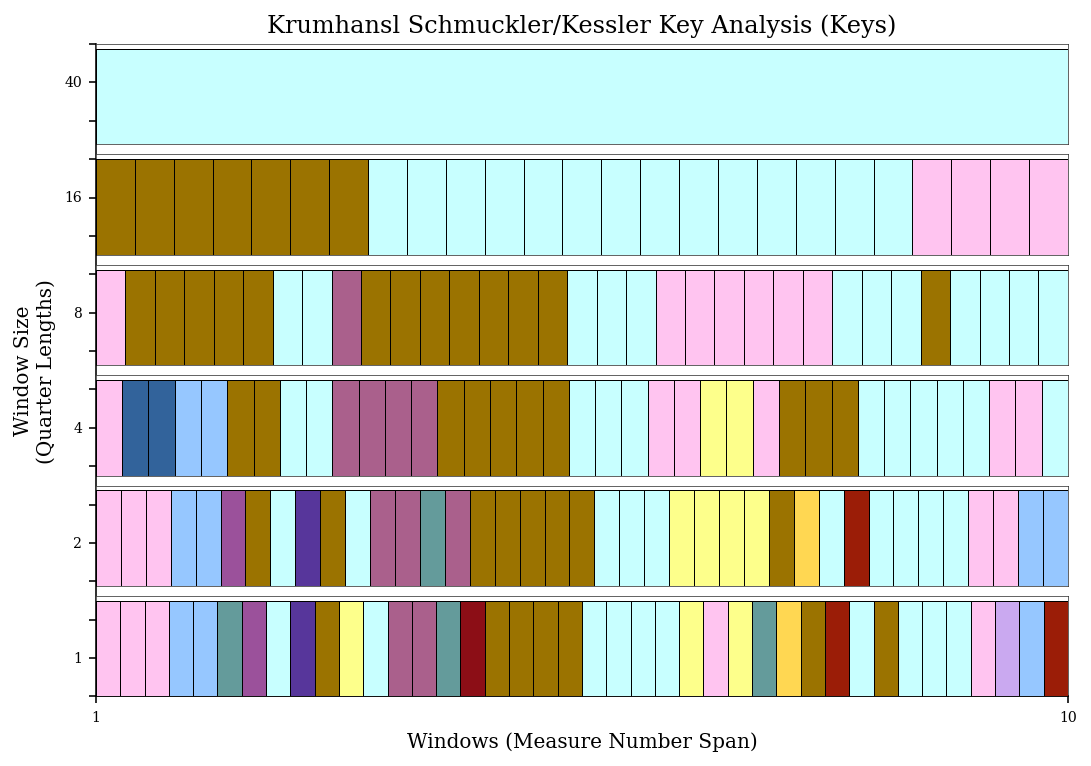

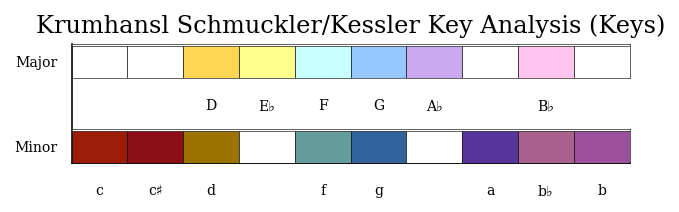

In [71]:
midi1.measures(1,10).plot('colorgrid')

In [3]:
path = './archive (1)/'
midi_list=[]

for i in os.listdir(path):
    if i.endswith('.mid'):
        full_path=path + i 
        midi=converter.parse(full_path)
        midi_list.append(midi)

In [4]:
def extract_notes(file):
    notes = []
    notes_to_parse = None
    
    for f in file:
        s2 = instrument.partitionByInstrument(f)
        for part in s2.parts:
            notes_to_parse = part.recurse()
            for element in notes_to_parse:
                if isinstance(element, note.Note):
                    notes.append(str(element.pitch))
                elif isinstance(element, chord.Chord):
                    notes.append(".".join(str(n) for n in element.normalOrder))

    return notes

note_corpus=extract_notes(midi_list)

print(f'Amount of notes from midis is: {len(note_corpus)}')

Amount of notes from midis is: 191520


In [6]:
#flattening array from 2d to 1d
notes_=[element for note_ in note_corpus for element in note_]

#amount of unique notes
unique_notes=list(set(notes_))

print(len(unique_notes))

20


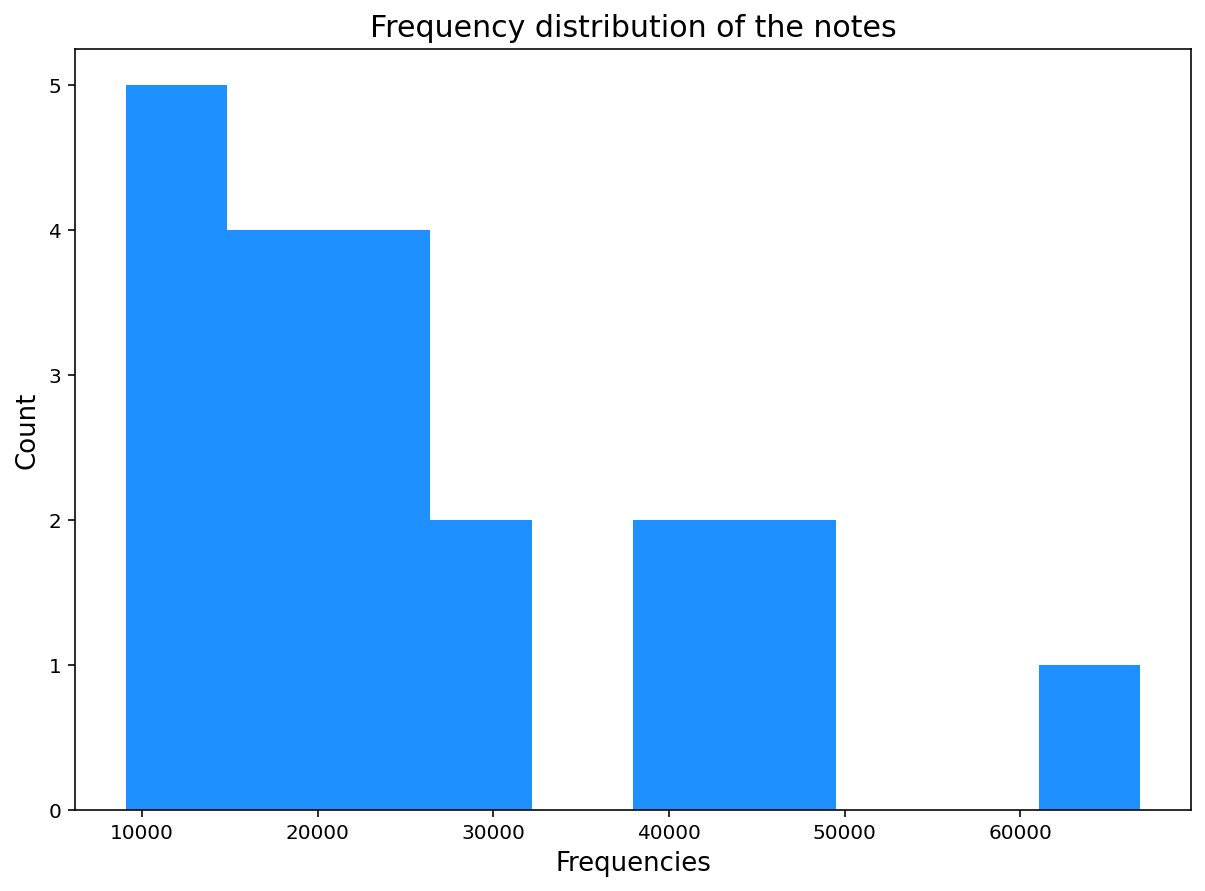

In [7]:
freq=dict(Counter(notes_))

only_freq=[count for _,count in freq.items()]

plt.figure(figsize=(10,7))
plt.title("Frequency distribution of the notes", fontsize=15)
plt.ylabel('Count', fontsize= 13)
plt.xlabel('Frequencies', fontsize= 13)
plt.hist(only_freq, color = 'dodgerblue');
#plot frequency distribution of notes